In [1]:
# 기본
import pandas as pd  # 데이터프레임 처리
import numpy as np  # 수치 계산
import matplotlib.pyplot as plt  # 데이터 시각화
import seaborn as sns  # 고급 시각화

# 경고 뜨지 않게 설정
import warnings  # 경고 무시 설정
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6  # 그래프 크기 설정
plt.rcParams['font.size'] = 14  # 글자 크기
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


### 데이터 준비

In [3]:
# parquet 파일 데이터를 읽어온다.
df1_train = pd.read_parquet('open/train/8.성과정보/201807_train_성과정보.parquet')
df1_test = pd.read_parquet('open/test/8.성과정보/201807_test_성과정보.parquet')
df1_test.head()

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201807,TEST_00000,0.204652,0.204652,0.204652,0.000000,0.000000,0.000000,0.0,1.411951,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.209395,0.231043,0.0,1.332770,1.780392
1,201807,TEST_00001,-0.340448,-0.290936,-0.257185,-0.583068,-1.999856,0.011254,0.0,-0.391841,...,0.999998,1.044473,1.991974,0.999998,0.926569,-0.269161,-0.247241,0.0,0.000000,0.000000
2,201807,TEST_00002,-0.214236,-0.214236,-0.210419,-1.999996,0.000000,0.000000,0.0,0.180290,...,0.999998,1.053083,0.999998,0.999998,0.999998,-0.120290,0.029270,0.0,4.123738,5.115589
3,201807,TEST_00003,0.011708,0.011708,0.011708,0.000000,0.000000,0.000000,0.0,0.286424,...,0.999998,1.991630,0.999998,0.999998,0.999998,0.035807,-0.013359,0.0,0.093615,0.349994
4,201807,TEST_00004,-0.136222,-0.136222,-0.052585,-1.999996,0.000000,-0.379615,0.0,-0.934180,...,0.999998,1.053743,0.999998,0.999998,0.999998,-0.538740,-0.449378,0.0,0.000000,0.000000


In [4]:
all_df = pd.concat([df1_train, df1_test], axis=0, ignore_index=True)

In [5]:
all_df.columns

Index(['기준년월', 'ID', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월',
       '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월',
       '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월',
       '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기',
       '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기',
       '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기',
       '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기',
       '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m',
       '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m',
       '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m',
       '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔',
       '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M',
       '혜택수혜율_R3M', '혜택수혜율_B0M'],
      dtype='object')

In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준년월                500000 non-null  int64  
 1   ID                  500000 non-null  object 
 2   증감율_이용건수_신용_전월      500000 non-null  float64
 3   증감율_이용건수_신판_전월      500000 non-null  float64
 4   증감율_이용건수_일시불_전월     500000 non-null  float64
 5   증감율_이용건수_할부_전월      500000 non-null  float64
 6   증감율_이용건수_CA_전월      500000 non-null  float64
 7   증감율_이용건수_체크_전월      500000 non-null  float64
 8   증감율_이용건수_카드론_전월     500000 non-null  float64
 9   증감율_이용금액_신용_전월      500000 non-null  float64
 10  증감율_이용금액_신판_전월      500000 non-null  float64
 11  증감율_이용금액_일시불_전월     500000 non-null  float64
 12  증감율_이용금액_할부_전월      500000 non-null  float64
 13  증감율_이용금액_CA_전월      500000 non-null  float64
 14  증감율_이용금액_체크_전월      500000 non-null  float64
 15  증감율_이용금액_카드론_전월     500000 non-nul

In [7]:
all_df.isna().sum()

기준년월                       0
ID                         0
증감율_이용건수_신용_전월             0
증감율_이용건수_신판_전월             0
증감율_이용건수_일시불_전월            0
증감율_이용건수_할부_전월             0
증감율_이용건수_CA_전월             0
증감율_이용건수_체크_전월             0
증감율_이용건수_카드론_전월            0
증감율_이용금액_신용_전월             0
증감율_이용금액_신판_전월             0
증감율_이용금액_일시불_전월            0
증감율_이용금액_할부_전월             0
증감율_이용금액_CA_전월             0
증감율_이용금액_체크_전월             0
증감율_이용금액_카드론_전월            0
증감율_이용건수_신용_분기             0
증감율_이용건수_신판_분기             0
증감율_이용건수_일시불_분기            0
증감율_이용건수_할부_분기             0
증감율_이용건수_CA_분기             0
증감율_이용건수_체크_분기             0
증감율_이용건수_카드론_분기            0
증감율_이용금액_신용_분기             0
증감율_이용금액_신판_분기             0
증감율_이용금액_일시불_분기            0
증감율_이용금액_할부_분기             0
증감율_이용금액_CA_분기             0
증감율_이용금액_체크_분기             0
증감율_이용금액_카드론_분기            0
잔액_신판평균한도소진율_r6m           0
잔액_신판최대한도소진율_r6m           0
잔액_신판평균한도소진율_r3m           0
잔액_신판최대한도소진율_r3m           0
잔액_신판ca평균한도소진율

## 📈 이용 증감률 및 잔액/한도 관련 지표 정리

## 🗓️ 기본 정보

| 컬럼명 | 설명 |
|--------|------|
| 기준년월 | 데이터 기준년월 |
| ID | 고유 ID |

---

## 📊 이용건수 증감률

### 🔹 전월 기준

| 컬럼명 | 설명 |
|--------|------|
| 증감율_이용건수_신용_전월 | 이용건수 증감율 (일시불+할부+현금서비스+카드론) |
| 증감율_이용건수_신판_전월 | 이용건수 증감율 (일시불+할부) |
| 증감율_이용건수_일시불_전월 | 이용건수 증감율 일시불 |
| 증감율_이용건수_할부_전월 | 이용건수 증감율 할부 |
| 증감율_이용건수_CA_전월 | 이용건수 증감율 현금서비스 |
| 증감율_이용건수_체크_전월 | 이용건수 증감율 체크 |
| 증감율_이용건수_카드론_전월 | 이용건수 증감율 카드론 |

### 🔹 분기 기준

| 컬럼명 | 설명 |
|--------|------|
| 증감율_이용건수_신용_분기 | 이용건수 증감율 (일시불+할부+현금서비스+카드론) |
| 증감율_이용건수_신판_분기 | 이용건수 증감율 (일시불+할부) |
| 증감율_이용건수_일시불_분기 | 이용건수 증감율 일시불 |
| 증감율_이용건수_할부_분기 | 이용건수 증감율 할부 |
| 증감율_이용건수_CA_분기 | 이용건수 증감율 현금서비스 |
| 증감율_이용건수_체크_분기 | 이용건수 증감율 체크 |
| 증감율_이용건수_카드론_분기 | 이용건수 증감율 카드론 |

---

## 💳 이용금액 증감률

### 🔹 전월 기준

| 컬럼명 | 설명 |
|--------|------|
| 증감율_이용금액_신용_전월 | 이용금액 증감율 (일시불+할부+현금서비스+카드론) |
| 증감율_이용금액_신판_전월 | 이용금액 증감율 (일시불+할부) |
| 증감율_이용금액_일시불_전월 | 이용금액 증감율 일시불 |
| 증감율_이용금액_할부_전월 | 이용금액 증감율 할부 |
| 증감율_이용금액_CA_전월 | 이용금액 증감율 현금서비스 |
| 증감율_이용금액_체크_전월 | 이용금액 증감율 체크 |
| 증감율_이용금액_카드론_전월 | 이용금액 증감율 카드론 |

### 🔹 분기 기준

| 컬럼명 | 설명 |
|--------|------|
| 증감율_이용금액_신용_분기 | 이용금액 증감율 (일시불+할부+현금서비스+카드론) |
| 증감율_이용금액_신판_분기 | 이용금액 증감율 (일시불+할부) |
| 증감율_이용금액_일시불_분기 | 이용금액 증감율 일시불 |
| 증감율_이용금액_할부_분기 | 이용금액 증감율 할부 |
| 증감율_이용금액_CA_분기 | 이용금액 증감율 현금서비스 |
| 증감율_이용금액_체크_분기 | 이용금액 증감율 체크 |
| 증감율_이용금액_카드론_분기 | 이용금액 증감율 카드론 |

---

## 🧮 한도 소진율 (신용+현금서비스)

| 컬럼명 | 설명 |
|--------|------|
| 잔액_신판평균한도소진율_r6m | 평균 한도 소진율 (신판, 최근 6개월) |
| 잔액_신판최대한도소진율_r6m | 최대 한도 소진율 (신판, 최근 6개월) |
| 잔액_신판평균한도소진율_r3m | 평균 한도 소진율 (신판, 최근 3개월) |
| 잔액_신판최대한도소진율_r3m | 최대 한도 소진율 (신판, 최근 3개월) |
| 잔액_신판ca평균한도소진율_r6m | 평균 한도 소진율 (현금서비스, 최근 6개월) |
| 잔액_신판ca최대한도소진율_r6m | 최대 한도 소진율 (현금서비스, 최근 6개월) |
| 잔액_신판ca평균한도소진율_r3m | 평균 한도 소진율 (현금서비스, 최근 3개월) |
| 잔액_신판ca최대한도소진율_r3m | 최대 한도 소진율 (현금서비스, 최근 3개월) |

---

## 📉 평균 잔액 변동률

| 컬럼명 | 설명 |
|--------|------|
| 변동률_일시불평잔 | 일시불 평균 잔액 변동률 |
| 변동률_RV일시불평잔 | 리볼빙 일시불 평균 잔액 변동률 |
| 변동률_할부평잔 | 할부 평균 잔액 변동률 |
| 변동률_CA평잔 | 현금서비스 평균 잔액 변동률 |
| 변동률_RVCA평잔 | 리볼빙 현금서비스 평균 잔액 변동률 |
| 변동률_카드론평잔 | 카드론 평균 잔액 변동률 |

---

## 💹 전체 잔액 변동률 (전월 대비)

| 컬럼명 | 설명 |
|--------|------|
| 변동률_잔액_B1M | 총 잔액 변동률 (1개월 전 대비) |
| 변동률_잔액_일시불_B1M | 일시불 잔액 변동률 |
| 변동률_잔액_CA_B1M | 현금서비스 잔액 변동률 |

---

## 🎁 혜택 수혜율

| 컬럼명 | 설명 |
|--------|------|
| 혜택수혜율_B0M | 혜택 수혜율 (당월) |
| 혜택수혜율_R3M | 혜택 수혜율 (최근 3개월간) |

In [9]:
### 컬럼의 정보를 알아보는 함수를 만든다. 

def analyze_column(col):
    # 1. 값의 분포 출력
    print(f"\n[📊 Value Counts for '{col}']\n")
    print(all_df[col].value_counts(dropna=False))  # 결측값도 포함

    # 2. 히스토그램
    print(f"\n[📈 Histogram for '{col}']\n")
    plt.figure(figsize=(10, 4))
    sns.histplot(data=all_df, x=col, kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # 3. 박스플롯
    print(f"\n[📦 Boxplot for '{col}']\n")
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=all_df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


In [10]:
all_df.columns

Index(['기준년월', 'ID', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월',
       '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월',
       '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월',
       '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기',
       '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기',
       '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기',
       '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기',
       '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m',
       '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m',
       '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m',
       '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔',
       '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M',
       '혜택수혜율_R3M', '혜택수혜율_B0M'],
      dtype='object')

In [12]:
# 데이터프레임의 컬럼 이름을 리스트에 담는다. 
column_list = all_df.columns.tolist()

In [13]:
print(column_list)

['기준년월', 'ID', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기', '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기', '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m', '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔', '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '혜택수혜율_R3M', '혜택수혜율_B0M']


In [14]:
column_list = column_list[2:]

In [15]:
print(column_list)

['증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기', '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기', '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m', '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔', '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '혜택수혜율_R3M', '혜택수혜율_B0M']



[📊 Value Counts for '증감율_이용건수_신용_전월']

증감율_이용건수_신용_전월
 0.000000    149651
-1.999996     18475
 1.999996     13496
 0.185652         3
 0.285756         2
              ...  
 0.059587         1
-0.080990         1
-0.541142         1
-0.098104         1
-0.048287         1
Name: count, Length: 317677, dtype: int64

[📈 Histogram for '증감율_이용건수_신용_전월']



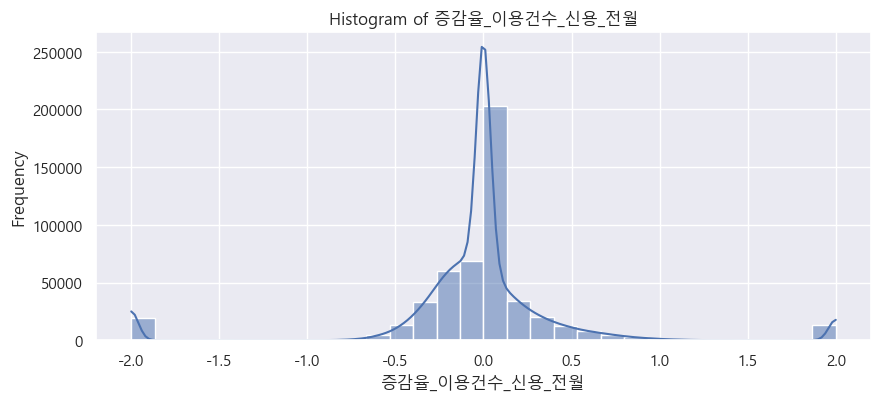


[📦 Boxplot for '증감율_이용건수_신용_전월']



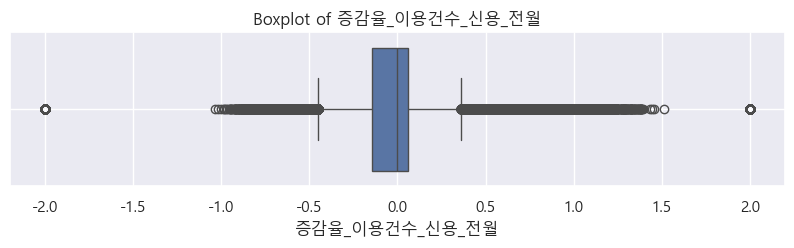

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_신판_전월']

증감율_이용건수_신판_전월
 0.000000    150509
-1.999996     18398
 1.999996     13565
 0.185652         3
-0.255240         3
              ...  
-0.200475         1
 0.057015         1
 0.623380         1
 0.144881         1
-0.048287         1
Name: count, Length: 316820, dtype: int64

[📈 Histogram for '증감율_이용건수_신판_전월']



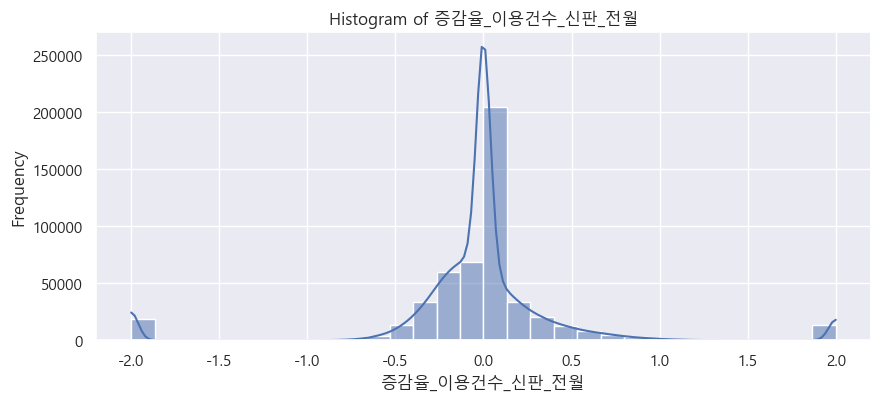


[📦 Boxplot for '증감율_이용건수_신판_전월']



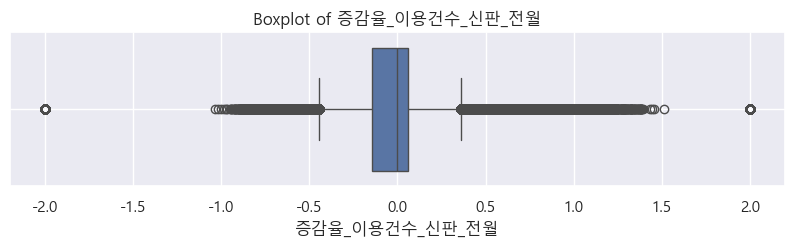

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_일시불_전월']

증감율_이용건수_일시불_전월
 0.000000    153391
-1.999996     16294
 1.999996     13402
 0.185652         3
-0.380302         3
              ...  
 0.679293         1
 0.201547         1
 0.582521         1
-0.303200         1
-0.048287         1
Name: count, Length: 316104, dtype: int64

[📈 Histogram for '증감율_이용건수_일시불_전월']



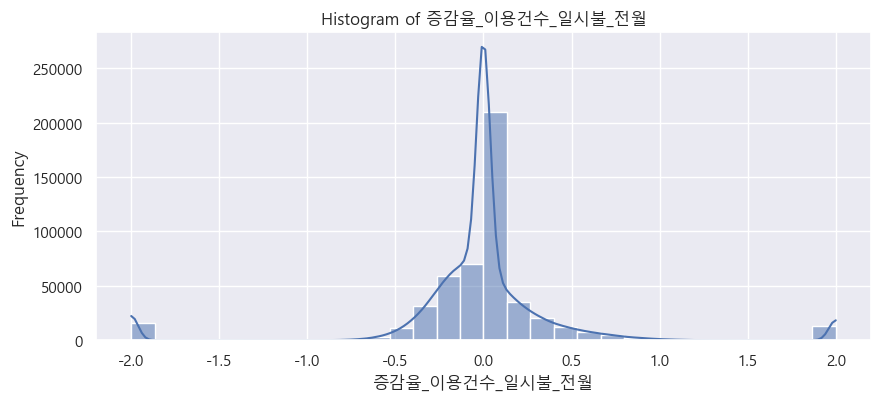


[📦 Boxplot for '증감율_이용건수_일시불_전월']



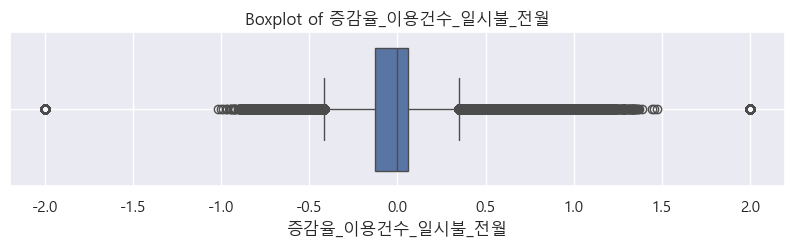

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_할부_전월']

증감율_이용건수_할부_전월
 0.000000    409514
-1.999996     56947
 1.999996     20449
-0.581542         3
-0.582367         2
              ...  
-0.581866         1
-0.579083         1
-0.578375         1
-0.578267         1
-0.586920         1
Name: count, Length: 13010, dtype: int64

[📈 Histogram for '증감율_이용건수_할부_전월']



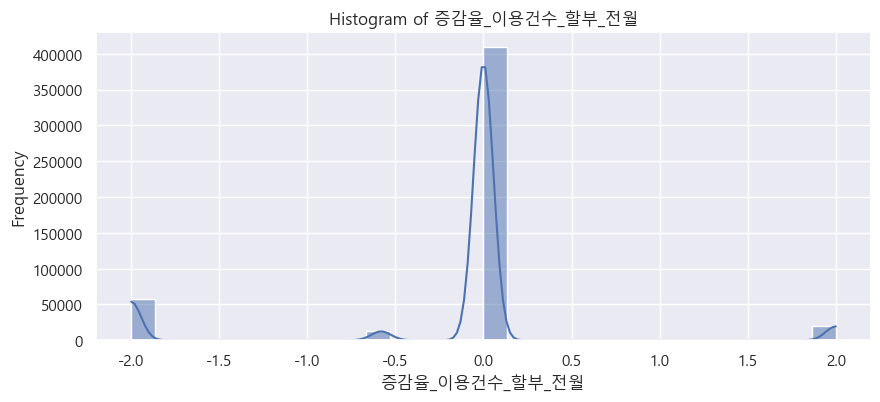


[📦 Boxplot for '증감율_이용건수_할부_전월']



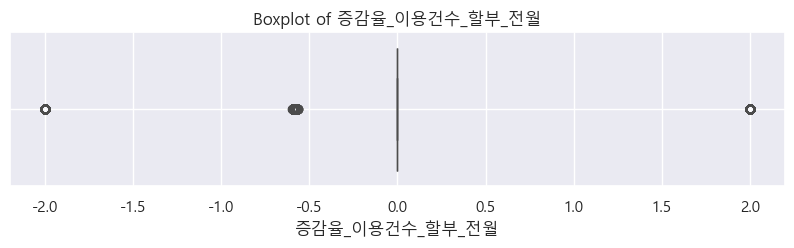

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_CA_전월']

증감율_이용건수_CA_전월
 0.000000    485923
-1.999996      4039
 1.999996       418
-1.999957         5
-1.999943         5
              ...  
-1.999879         1
-1.999907         1
-1.999903         1
-1.999905         1
-1.999771         1
Name: count, Length: 8138, dtype: int64

[📈 Histogram for '증감율_이용건수_CA_전월']



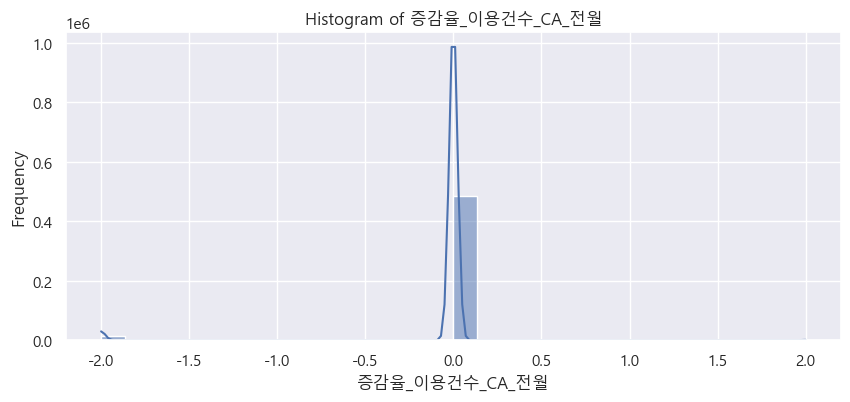


[📦 Boxplot for '증감율_이용건수_CA_전월']



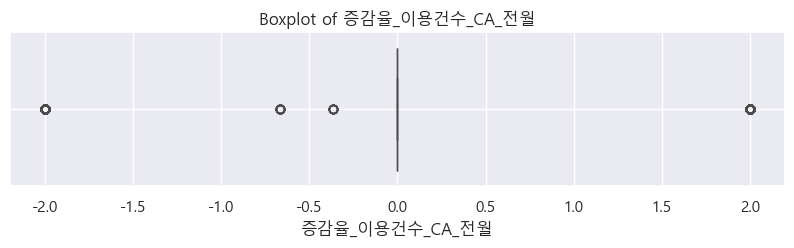

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_체크_전월']

증감율_이용건수_체크_전월
 0.000000    429088
-0.094433         2
-0.335525         2
-0.342723         2
-0.276783         2
              ...  
-0.745174         1
-0.282165         1
-0.310323         1
-0.260985         1
-0.171245         1
Name: count, Length: 70840, dtype: int64

[📈 Histogram for '증감율_이용건수_체크_전월']



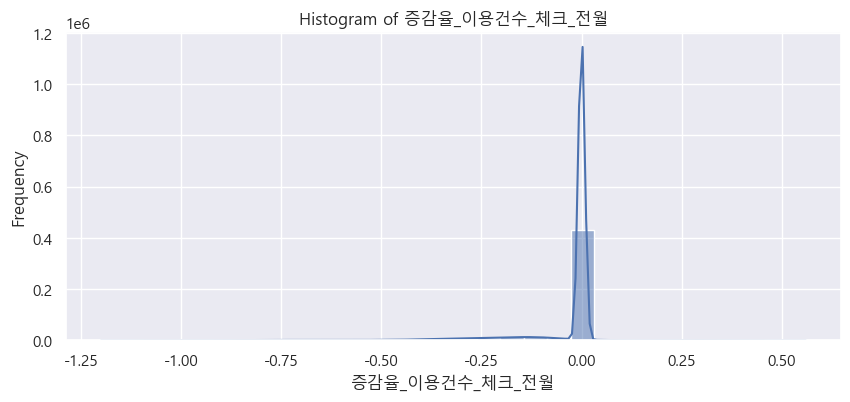


[📦 Boxplot for '증감율_이용건수_체크_전월']



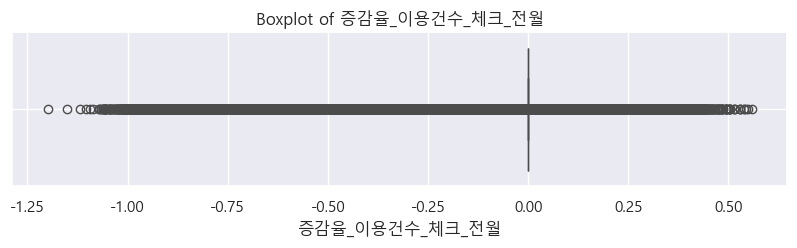

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_카드론_전월']

증감율_이용건수_카드론_전월
 0.000000    496618
-1.999996      3382
Name: count, dtype: int64

[📈 Histogram for '증감율_이용건수_카드론_전월']



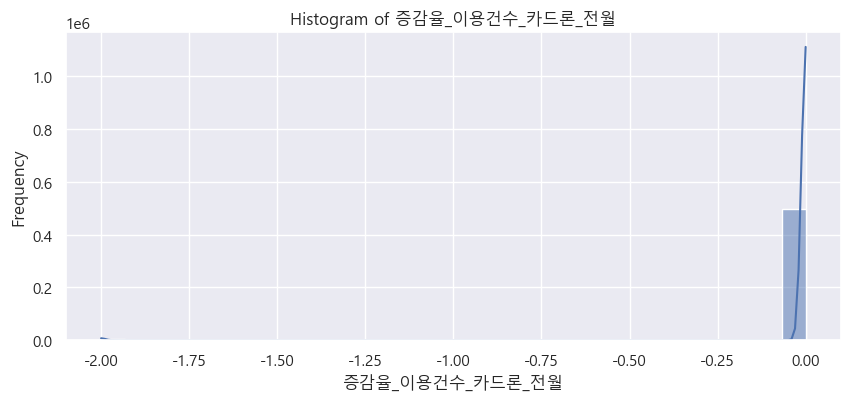


[📦 Boxplot for '증감율_이용건수_카드론_전월']



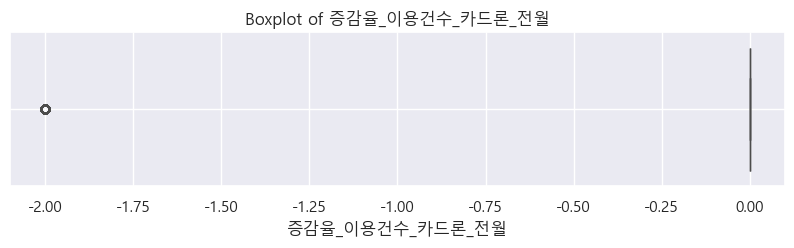

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_신용_전월']

증감율_이용금액_신용_전월
 0.000028    25
 0.000024    23
 0.000005    23
 0.000030    23
 0.000015    23
             ..
-0.000244     1
 0.202154     1
 0.226099     1
 0.310277     1
 0.168779     1
Name: count, Length: 389500, dtype: int64

[📈 Histogram for '증감율_이용금액_신용_전월']



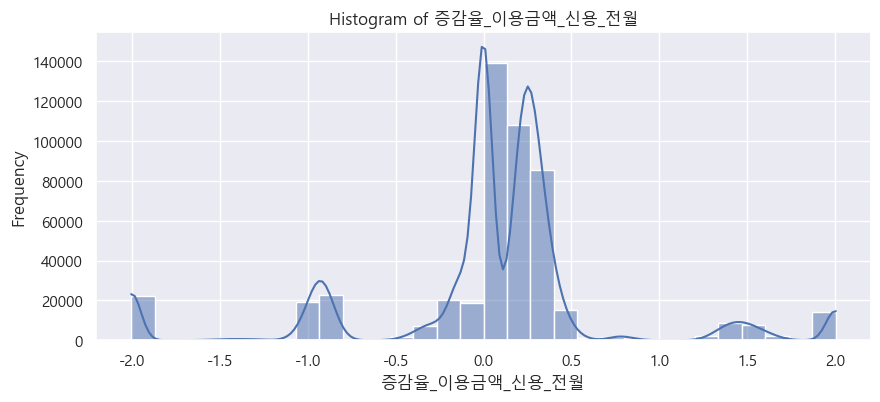


[📦 Boxplot for '증감율_이용금액_신용_전월']



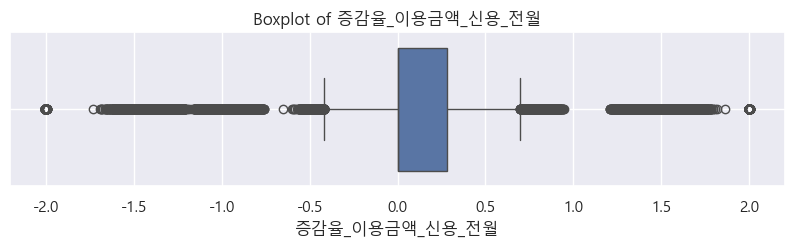

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_신판_전월']

증감율_이용금액_신판_전월
 0.000028    25
 0.000024    23
 0.000030    23
 0.000005    23
 0.000015    23
             ..
-0.140267     1
 0.000320     1
 0.208757     1
 0.219122     1
 0.168779     1
Name: count, Length: 388778, dtype: int64

[📈 Histogram for '증감율_이용금액_신판_전월']



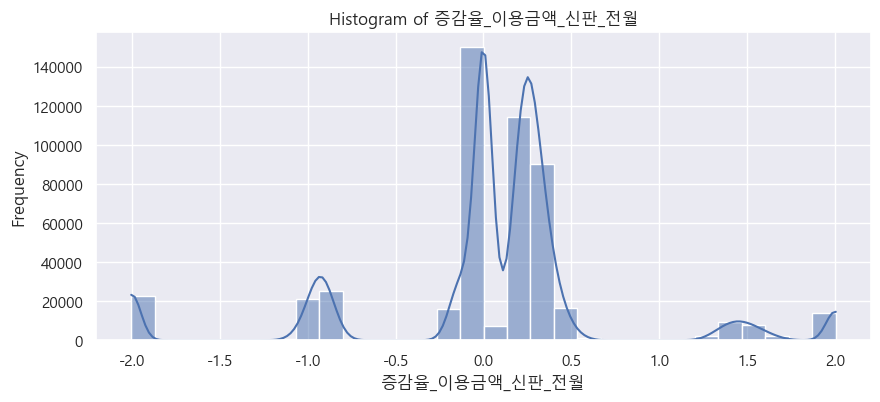


[📦 Boxplot for '증감율_이용금액_신판_전월']



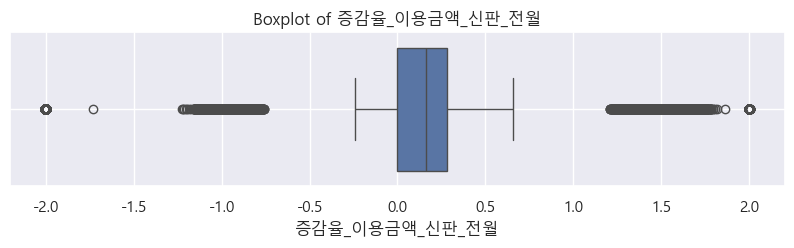

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_일시불_전월']

증감율_이용금액_일시불_전월
0.000028    25
0.000005    23
0.000015    23
0.000030    23
0.000025    23
            ..
0.188147     1
0.285304     1
0.000232     1
0.283729     1
0.168779     1
Name: count, Length: 386885, dtype: int64

[📈 Histogram for '증감율_이용금액_일시불_전월']



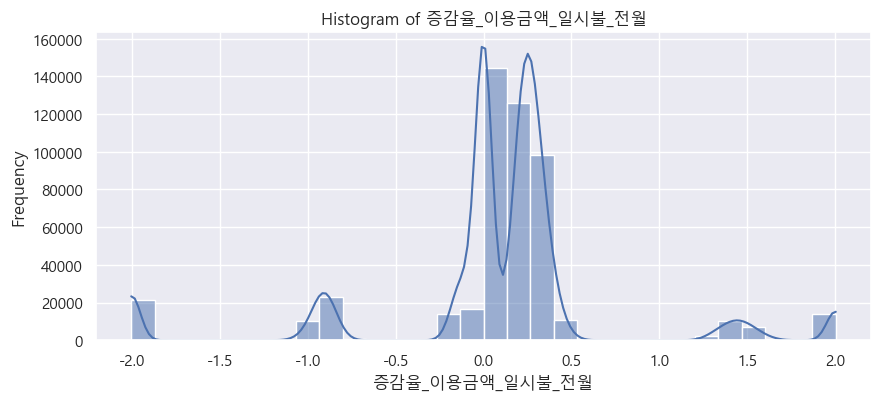


[📦 Boxplot for '증감율_이용금액_일시불_전월']



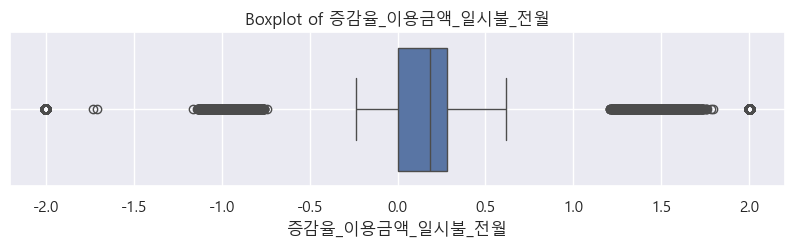

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_할부_전월']

증감율_이용금액_할부_전월
 0.000000    403991
-1.999996     34956
 1.999996     21299
 0.018868         2
-0.064696         2
              ...  
-0.105399         1
-0.088814         1
-0.030957         1
-0.053777         1
-0.139395         1
Name: count, Length: 39724, dtype: int64

[📈 Histogram for '증감율_이용금액_할부_전월']



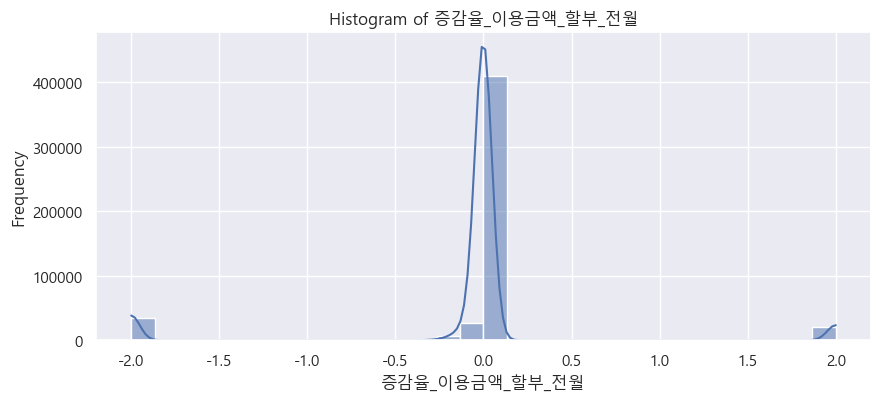


[📦 Boxplot for '증감율_이용금액_할부_전월']



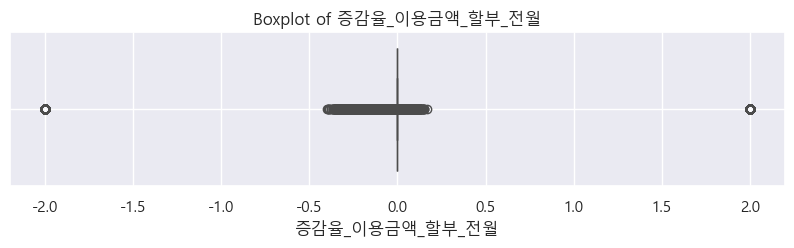

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_CA_전월']

증감율_이용금액_CA_전월
 0.000000    478470
-1.999996      8885
 1.999996       794
 0.012227         2
-0.026892         2
              ...  
-0.024123         1
 0.003179         1
 0.002178         1
 0.029498         1
-0.063695         1
Name: count, Length: 11847, dtype: int64

[📈 Histogram for '증감율_이용금액_CA_전월']



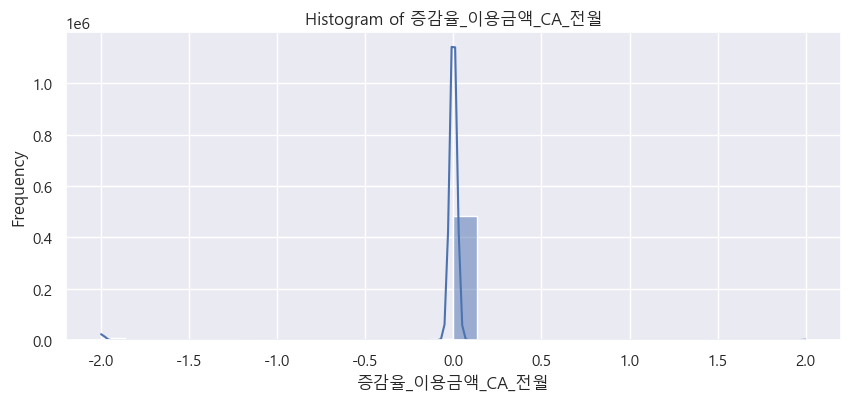


[📦 Boxplot for '증감율_이용금액_CA_전월']



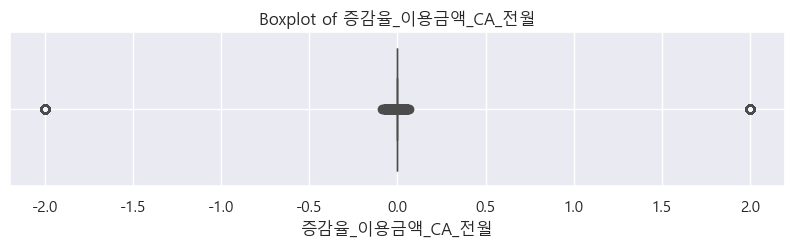

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_체크_전월']

증감율_이용금액_체크_전월
 0.000000    432536
-1.999996      3708
-0.016645         2
-0.000863         2
 0.044426         2
              ...  
-0.000629         1
-0.039710         1
-0.119073         1
-0.002847         1
-0.079963         1
Name: count, Length: 63642, dtype: int64

[📈 Histogram for '증감율_이용금액_체크_전월']



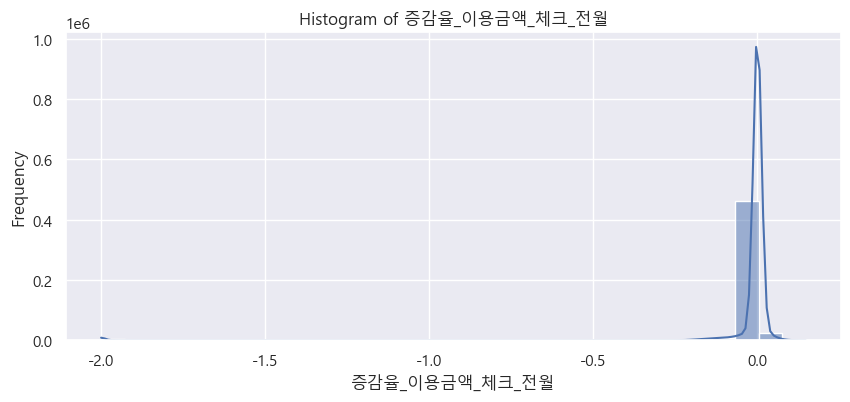


[📦 Boxplot for '증감율_이용금액_체크_전월']



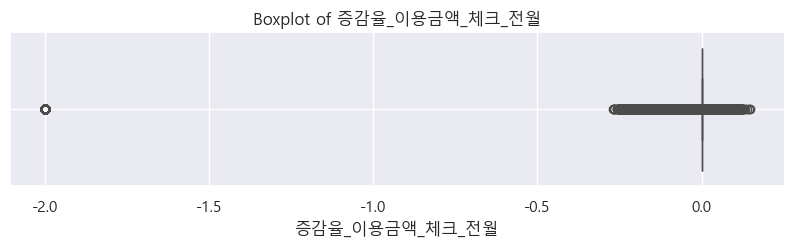

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_카드론_전월']

증감율_이용금액_카드론_전월
 0.000000    496481
-1.999996      3519
Name: count, dtype: int64

[📈 Histogram for '증감율_이용금액_카드론_전월']



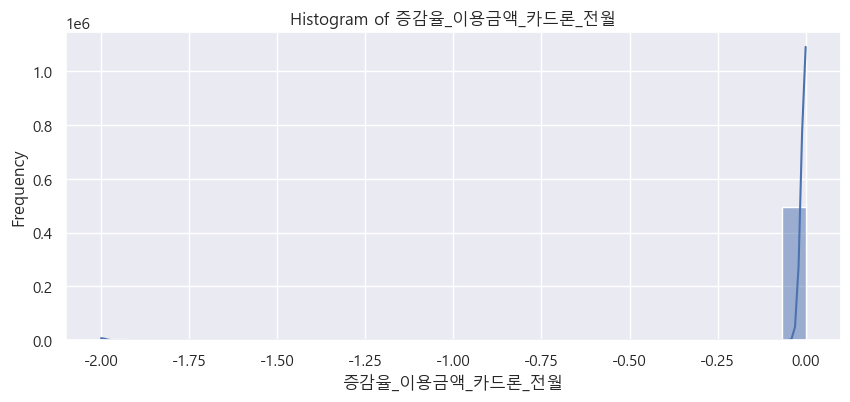


[📦 Boxplot for '증감율_이용금액_카드론_전월']



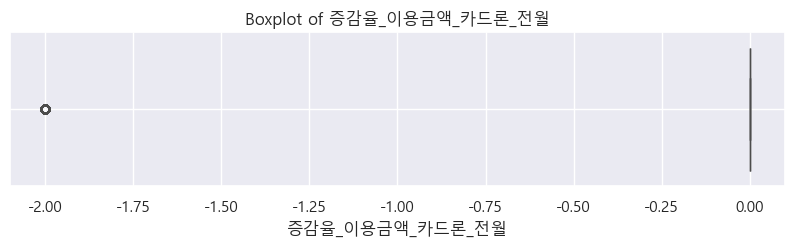

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_신용_분기']

증감율_이용건수_신용_분기
 0.000000    97741
 1.999996    28817
-1.999996    17891
-0.209343        3
 0.183603        3
             ...  
 0.015397        1
 0.787057        1
 0.985644        1
 0.308063        1
 0.085714        1
Name: count, Length: 354860, dtype: int64

[📈 Histogram for '증감율_이용건수_신용_분기']



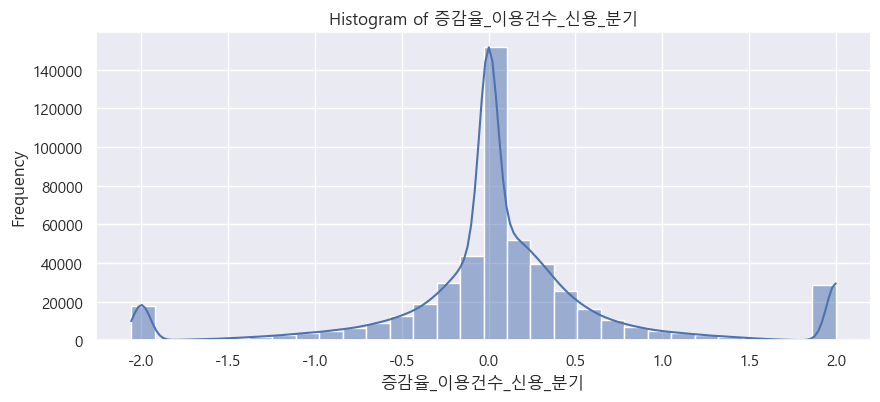


[📦 Boxplot for '증감율_이용건수_신용_분기']



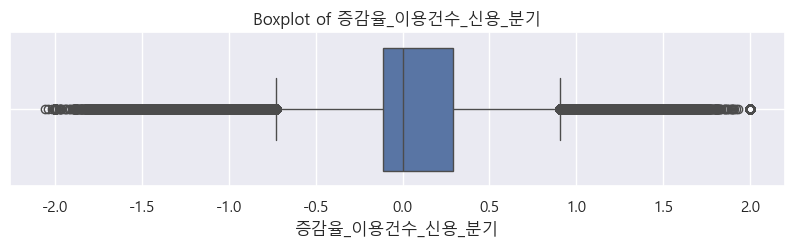

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_신판_분기']

증감율_이용건수_신판_분기
 0.000000    98758
 1.999996    28579
-1.999996    17627
-0.209343        3
 0.183603        3
             ...  
 0.472760        1
 0.558922        1
 0.485429        1
 0.233094        1
 0.085714        1
Name: count, Length: 354321, dtype: int64

[📈 Histogram for '증감율_이용건수_신판_분기']



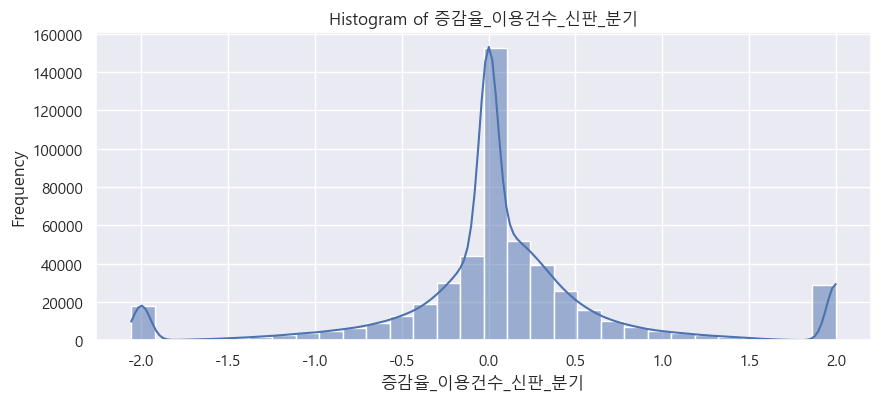


[📦 Boxplot for '증감율_이용건수_신판_분기']



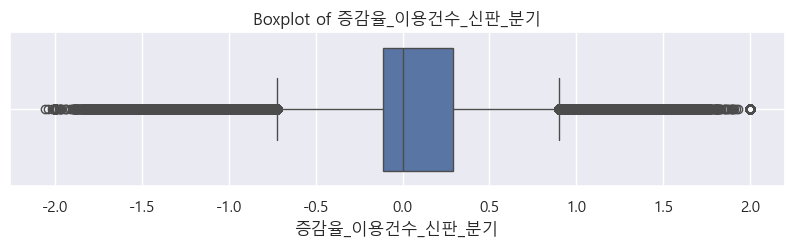

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_일시불_분기']

증감율_이용건수_일시불_분기
 0.000000    101413
 1.999996     27642
-1.999996     16532
-0.400470         3
-0.209343         3
              ...  
 0.125705         1
 0.252658         1
 0.337160         1
 0.894172         1
 0.081487         1
Name: count, Length: 353512, dtype: int64

[📈 Histogram for '증감율_이용건수_일시불_분기']



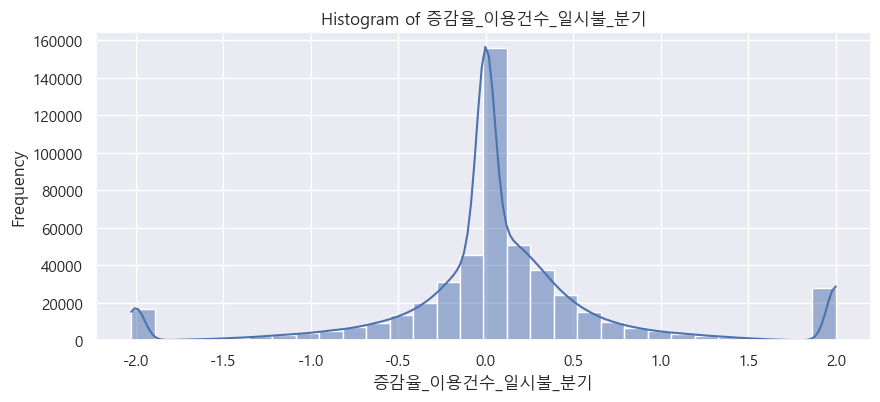


[📦 Boxplot for '증감율_이용건수_일시불_분기']



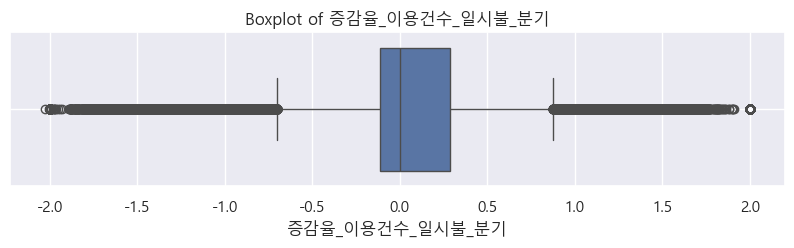

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_할부_분기']

증감율_이용건수_할부_분기
 0.000000    356909
-1.999996     51058
 1.999996     46167
 0.336570         3
 0.338351         3
              ...  
 0.334816         1
-1.108183         1
-1.123923         1
 0.337711         1
 0.341827         1
Name: count, Length: 45550, dtype: int64

[📈 Histogram for '증감율_이용건수_할부_분기']



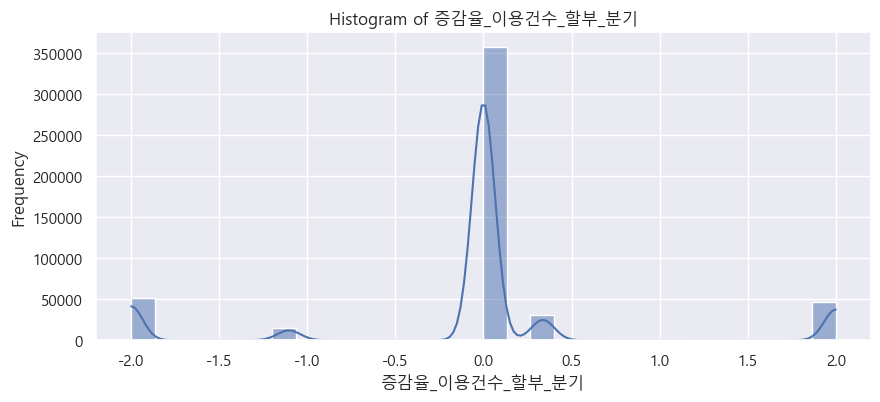


[📦 Boxplot for '증감율_이용건수_할부_분기']



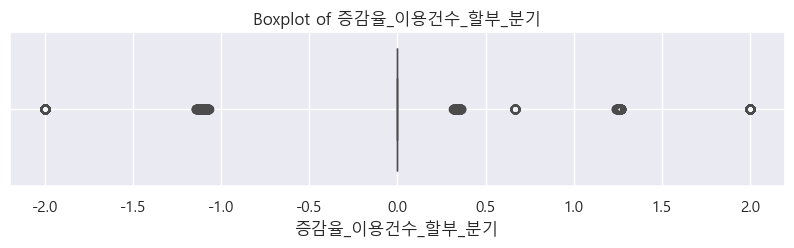

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_CA_분기']

증감율_이용건수_CA_분기
 0.000000    466057
-1.999996     13522
 1.999996     12142
 0.335214         2
 0.339972         2
              ...  
 0.337609         1
-1.084571         1
 0.338210         1
 0.337985         1
 0.338989         1
Name: count, Length: 8261, dtype: int64

[📈 Histogram for '증감율_이용건수_CA_분기']



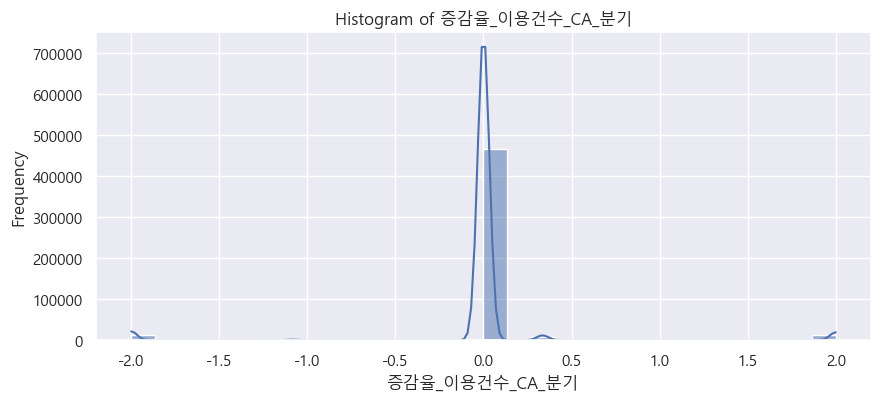


[📦 Boxplot for '증감율_이용건수_CA_분기']



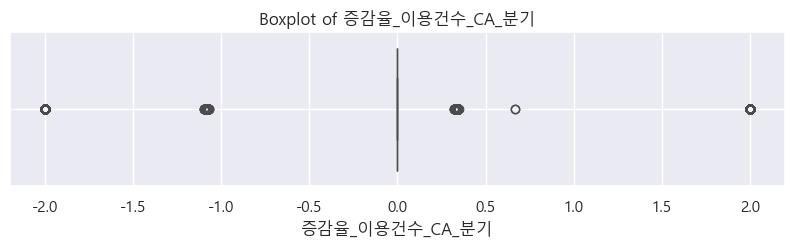

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_체크_분기']

증감율_이용건수_체크_분기
 0.000000    407882
-1.999996     12590
 1.999996     10312
-0.067128         2
 0.025997         2
              ...  
-0.040623         1
 0.019977         1
 0.181806         1
-0.060220         1
 0.042818         1
Name: count, Length: 69119, dtype: int64

[📈 Histogram for '증감율_이용건수_체크_분기']



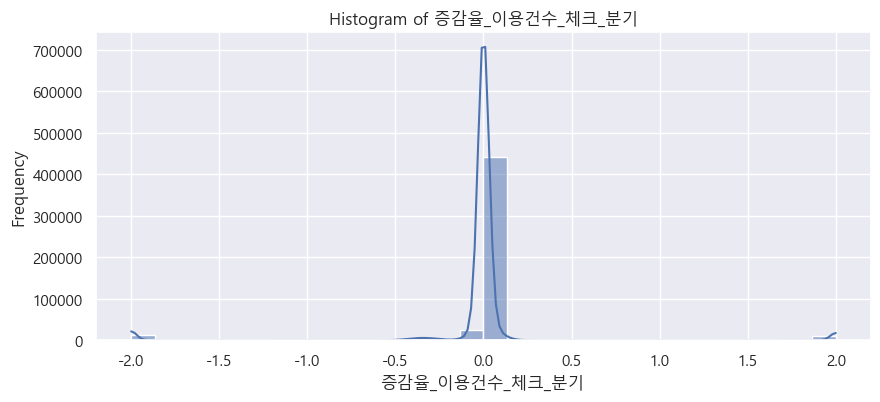


[📦 Boxplot for '증감율_이용건수_체크_분기']



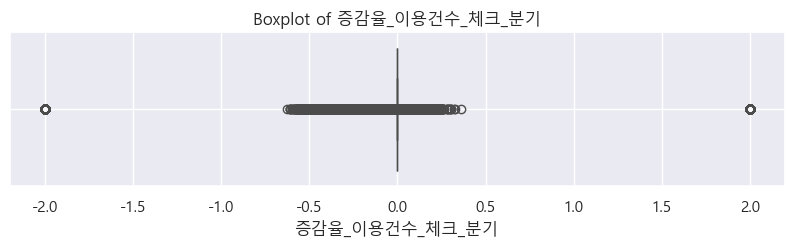

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용건수_카드론_분기']

증감율_이용건수_카드론_분기
 0.000000    484507
-1.999996      8464
 1.999996      7029
Name: count, dtype: int64

[📈 Histogram for '증감율_이용건수_카드론_분기']



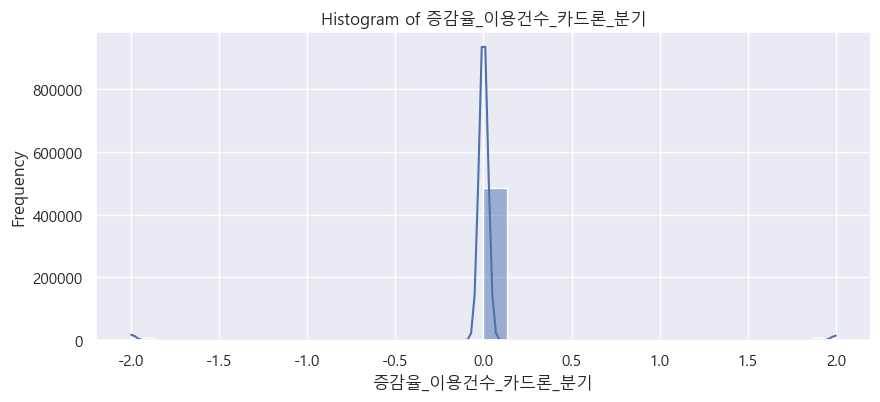


[📦 Boxplot for '증감율_이용건수_카드론_분기']



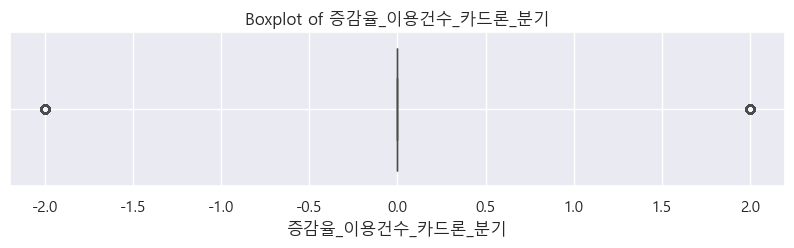

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_신용_분기']

증감율_이용금액_신용_분기
 0.000000    86636
 1.999996    28023
-1.999996    17121
 0.010252        3
-0.754612        2
             ...  
 0.312979        1
-0.241718        1
-0.089425        1
-0.478765        1
-0.023046        1
Name: count, Length: 367521, dtype: int64

[📈 Histogram for '증감율_이용금액_신용_분기']



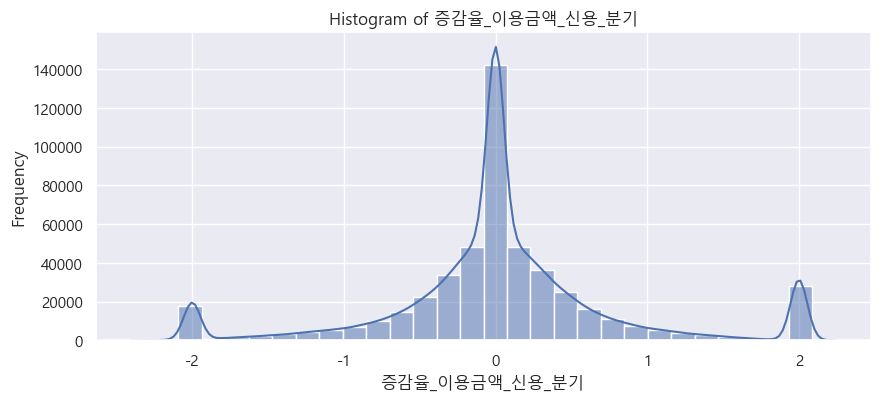


[📦 Boxplot for '증감율_이용금액_신용_분기']



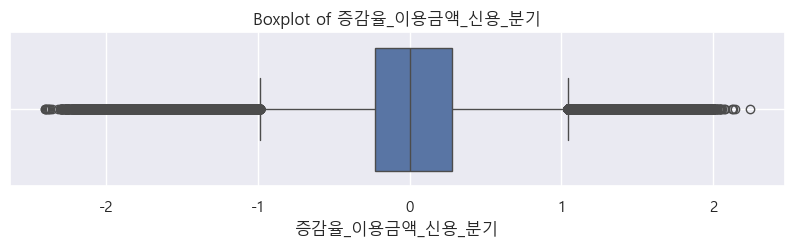

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_신판_분기']

증감율_이용금액_신판_분기
 0.000000    88204
 1.999996    28080
-1.999996    17145
 0.010252        3
 0.719975        3
             ...  
 0.244984        1
 0.034319        1
-0.167811        1
-0.313803        1
-0.023046        1
Name: count, Length: 365829, dtype: int64

[📈 Histogram for '증감율_이용금액_신판_분기']



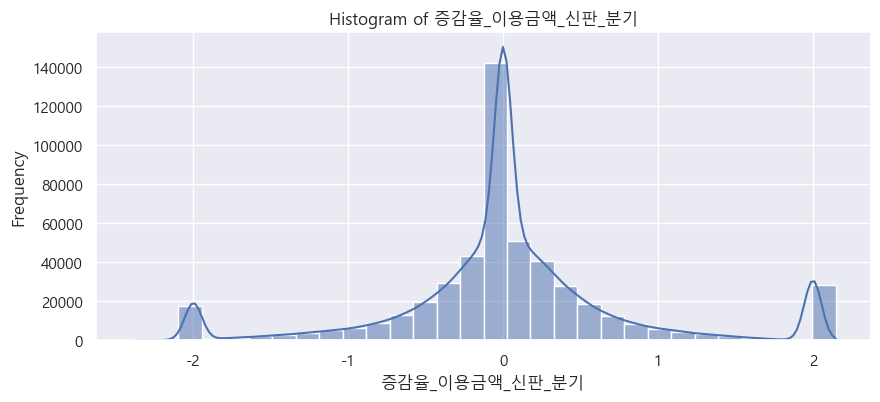


[📦 Boxplot for '증감율_이용금액_신판_분기']



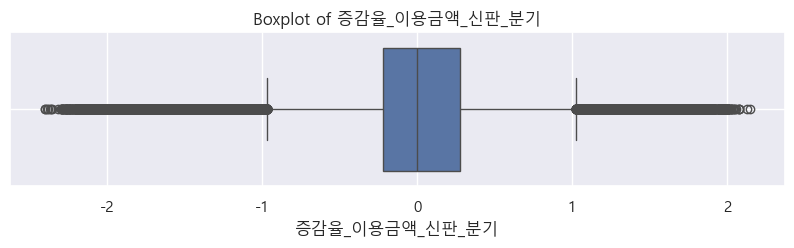

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_일시불_분기']

증감율_이용금액_일시불_분기
 0.000000    90787
 1.999996    27485
-1.999996    16457
 0.010252        3
-0.678518        2
             ...  
 0.540142        1
 0.448344        1
 0.498203        1
 0.025836        1
 0.265768        1
Name: count, Length: 364321, dtype: int64

[📈 Histogram for '증감율_이용금액_일시불_분기']



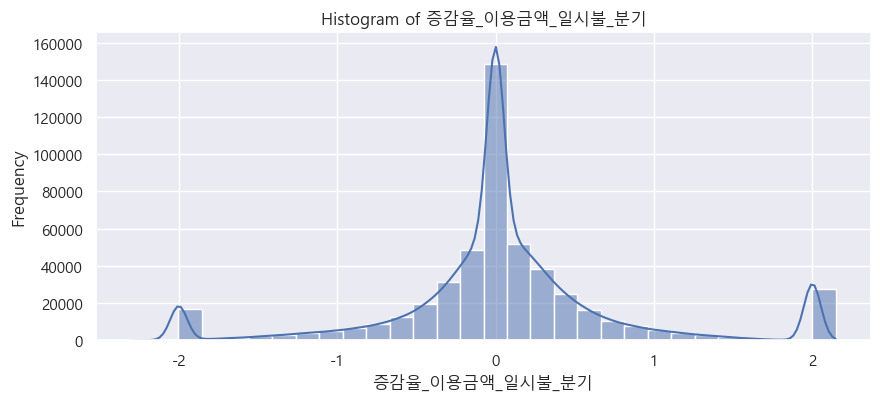


[📦 Boxplot for '증감율_이용금액_일시불_분기']



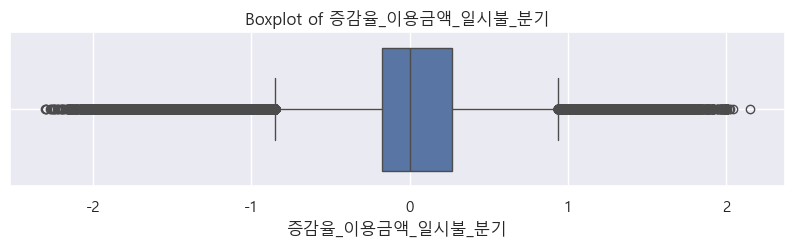

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_할부_분기']

증감율_이용금액_할부_분기
 0.000000    324129
-1.999996     47021
 1.999996     40390
-0.135079         2
-0.296753         2
              ...  
 0.171714         1
-0.275703         1
-0.287693         1
-0.075954         1
 0.203871         1
Name: count, Length: 88359, dtype: int64

[📈 Histogram for '증감율_이용금액_할부_분기']



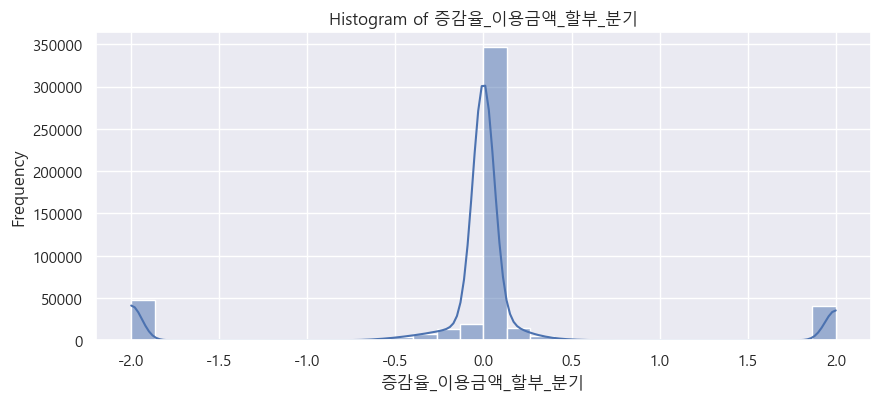


[📦 Boxplot for '증감율_이용금액_할부_분기']



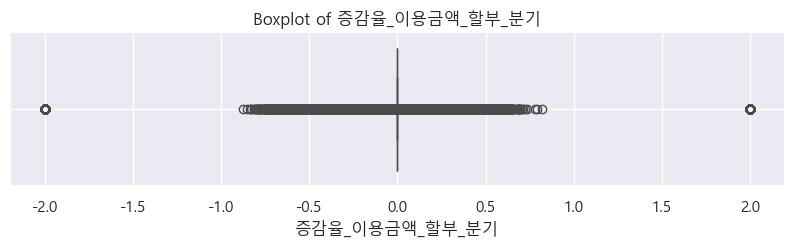

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_CA_분기']

증감율_이용금액_CA_분기
 0.000000    453179
-1.999996     11558
 1.999996      9685
 0.111618         2
 0.090495         2
              ...  
 0.131898         1
 0.106295         1
 0.109049         1
 0.114833         1
-0.060014         1
Name: count, Length: 25561, dtype: int64

[📈 Histogram for '증감율_이용금액_CA_분기']



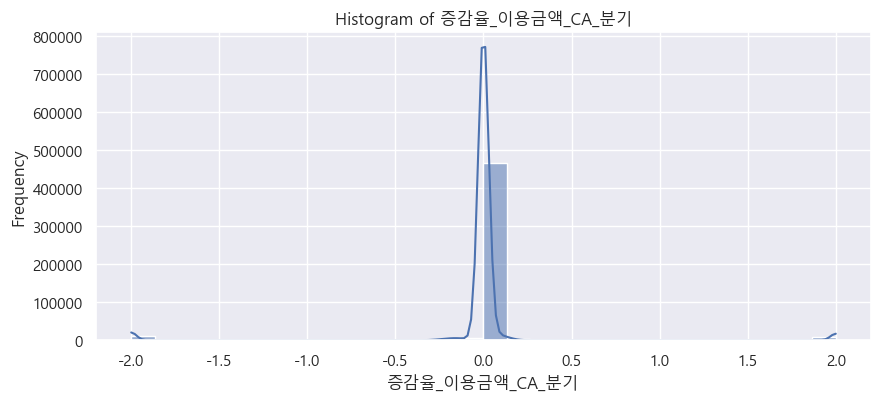


[📦 Boxplot for '증감율_이용금액_CA_분기']



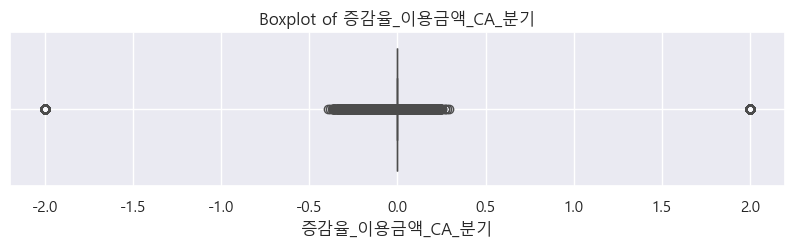

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_체크_분기']

증감율_이용금액_체크_분기
 0.000000    407817
-1.999996     12406
 1.999996     10033
 0.033933         2
 0.025970         2
              ...  
-0.074630         1
 0.040917         1
-0.425268         1
-0.024461         1
 0.054782         1
Name: count, Length: 69633, dtype: int64

[📈 Histogram for '증감율_이용금액_체크_분기']



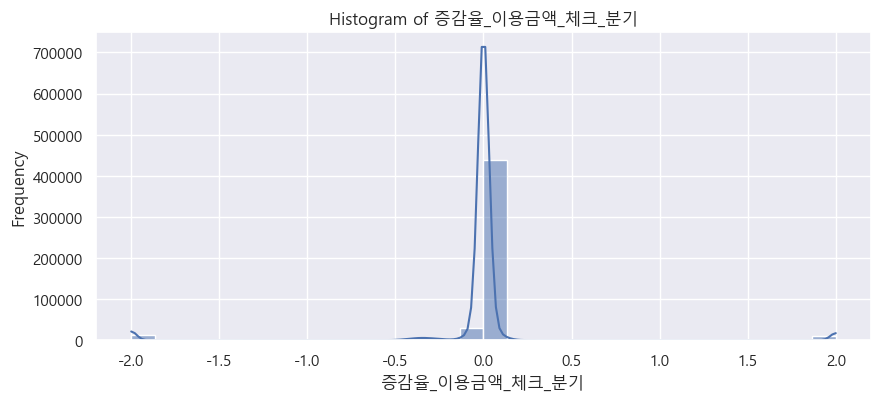


[📦 Boxplot for '증감율_이용금액_체크_분기']



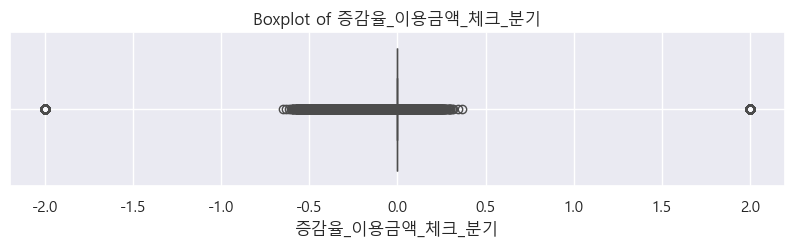

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '증감율_이용금액_카드론_분기']

증감율_이용금액_카드론_분기
 0.000000    484386
-1.999996      8514
 1.999996      7100
Name: count, dtype: int64

[📈 Histogram for '증감율_이용금액_카드론_분기']



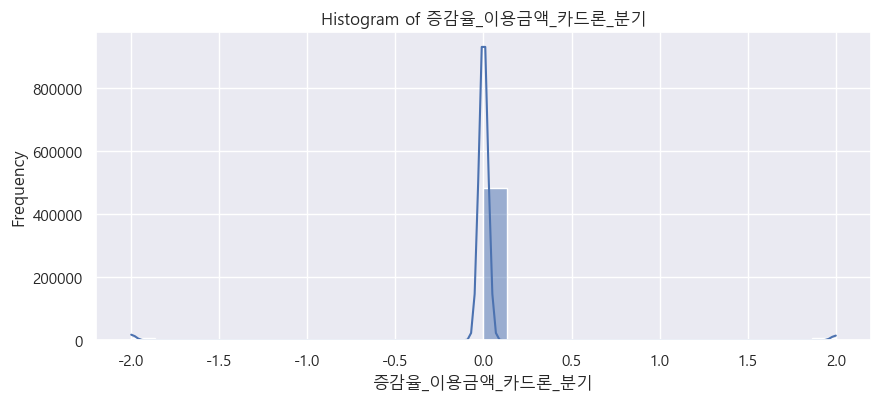


[📦 Boxplot for '증감율_이용금액_카드론_분기']



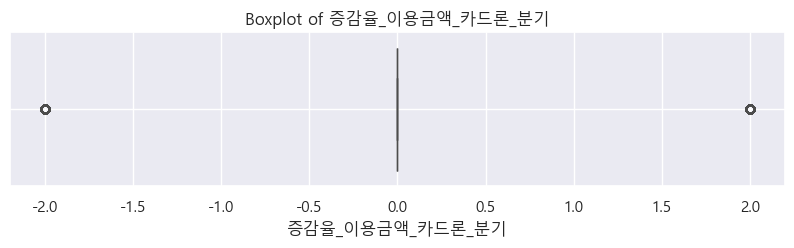

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '잔액_신판평균한도소진율_r6m']

잔액_신판평균한도소진율_r6m
0.000000    95772
0.026076        3
0.003207        3
0.021914        3
0.001840        3
            ...  
0.127225        1
0.206479        1
0.239510        1
0.117675        1
0.427583        1
Name: count, Length: 400020, dtype: int64

[📈 Histogram for '잔액_신판평균한도소진율_r6m']



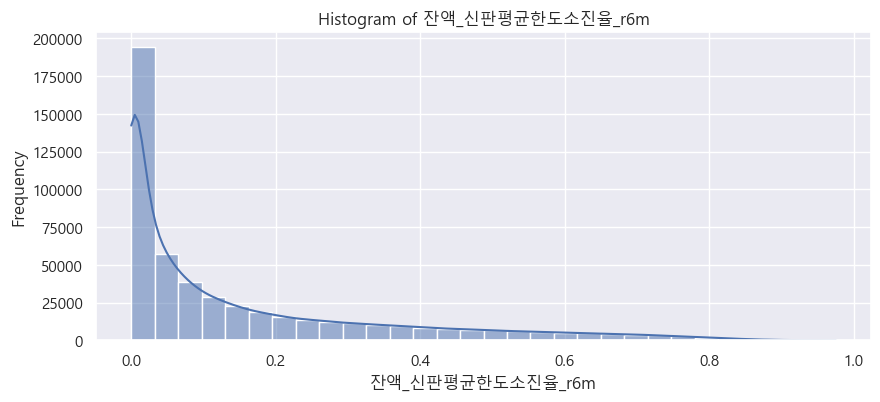


[📦 Boxplot for '잔액_신판평균한도소진율_r6m']



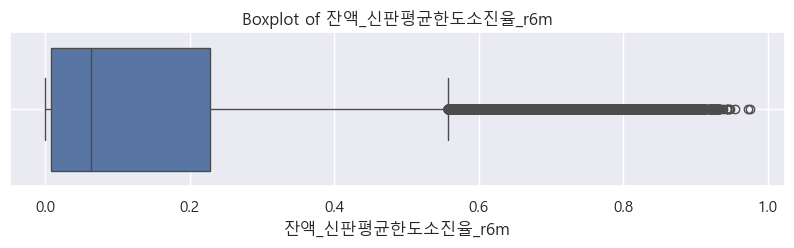

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '잔액_신판최대한도소진율_r6m']

잔액_신판최대한도소진율_r6m
0.000000    74703
0.058160        3
0.003478        3
0.001749        3
0.017269        3
            ...  
0.646192        1
0.855869        1
0.168266        1
0.130099        1
0.642975        1
Name: count, Length: 421825, dtype: int64

[📈 Histogram for '잔액_신판최대한도소진율_r6m']



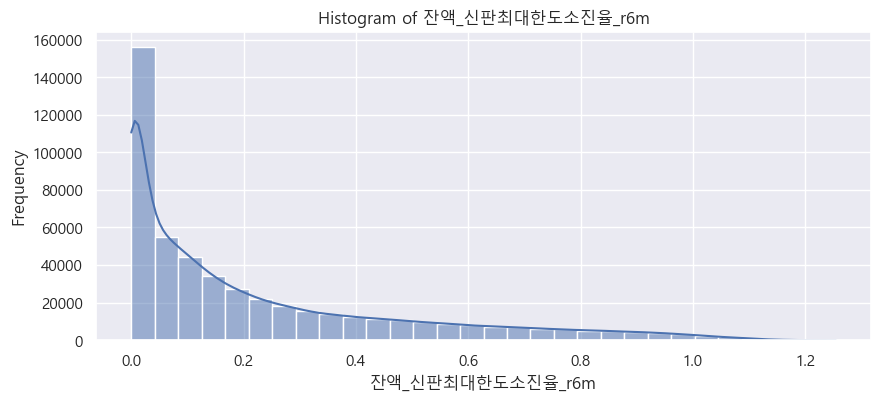


[📦 Boxplot for '잔액_신판최대한도소진율_r6m']



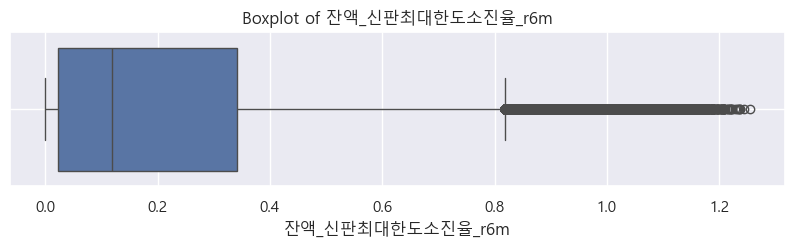

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '잔액_신판평균한도소진율_r3m']

잔액_신판평균한도소진율_r3m
0.000000    101726
0.027315         4
0.014246         4
0.004295         3
0.038473         3
             ...  
0.037337         1
0.653440         1
0.004238         1
0.033238         1
0.002794         1
Name: count, Length: 393907, dtype: int64

[📈 Histogram for '잔액_신판평균한도소진율_r3m']



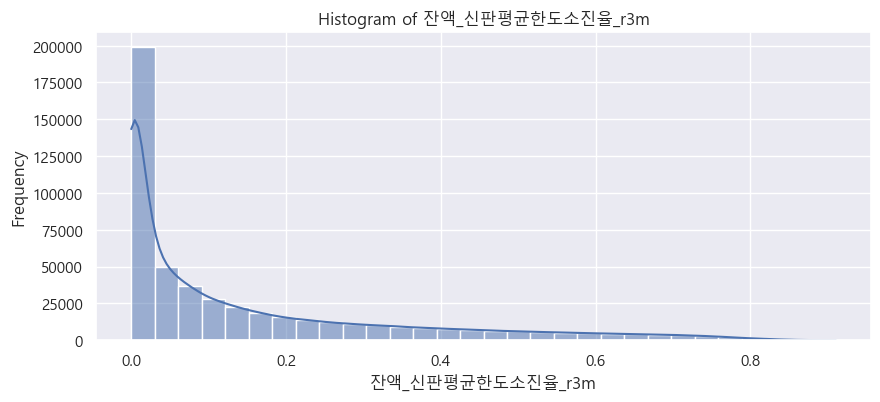


[📦 Boxplot for '잔액_신판평균한도소진율_r3m']



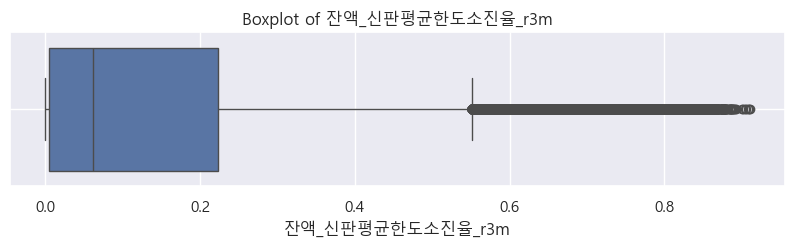

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '잔액_신판최대한도소진율_r3m']

잔액_신판최대한도소진율_r3m
0.000000    102826
0.047436         3
0.043050         3
0.011400         3
0.009012         3
             ...  
0.056698         1
0.063579         1
0.018133         1
0.037855         1
0.557315         1
Name: count, Length: 393805, dtype: int64

[📈 Histogram for '잔액_신판최대한도소진율_r3m']



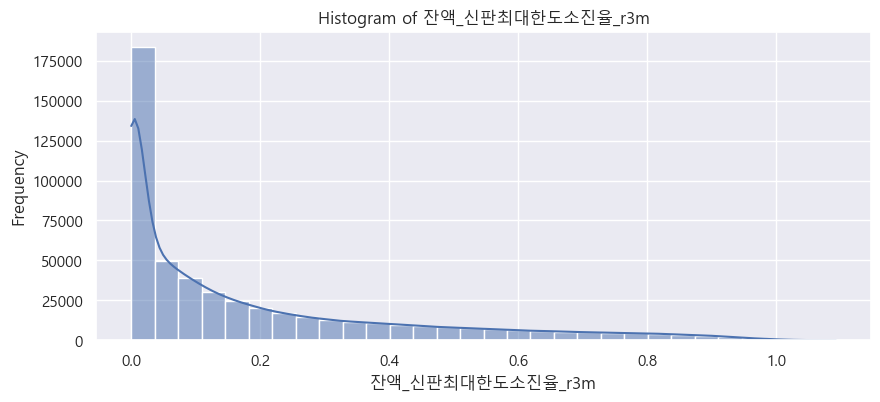


[📦 Boxplot for '잔액_신판최대한도소진율_r3m']



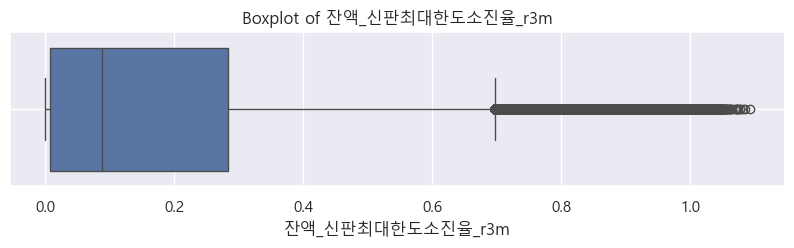

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '잔액_신판ca평균한도소진율_r6m']

잔액_신판ca평균한도소진율_r6m
0.000000    100148
0.006213         3
0.020966         3
0.017650         3
0.003883         3
             ...  
0.149504         1
0.140996         1
0.333138         1
0.238681         1
0.394650         1
Name: count, Length: 395813, dtype: int64

[📈 Histogram for '잔액_신판ca평균한도소진율_r6m']



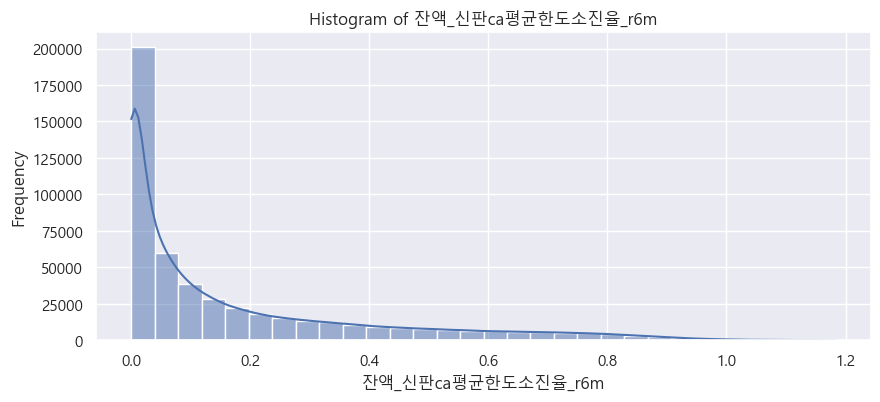


[📦 Boxplot for '잔액_신판ca평균한도소진율_r6m']



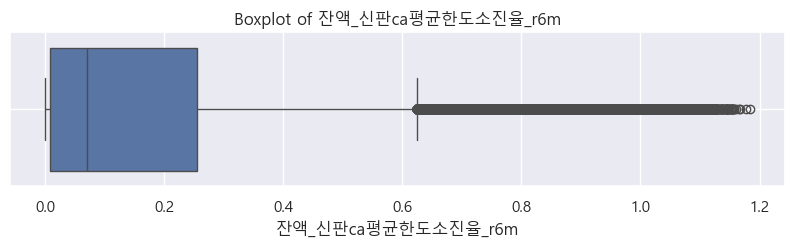

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '잔액_신판ca최대한도소진율_r6m']

잔액_신판ca최대한도소진율_r6m
0.000000    77716
0.002931        3
0.000814        3
0.009601        3
0.014620        3
            ...  
0.953029        1
1.001435        1
0.510574        1
0.323890        1
0.613080        1
Name: count, Length: 418935, dtype: int64

[📈 Histogram for '잔액_신판ca최대한도소진율_r6m']



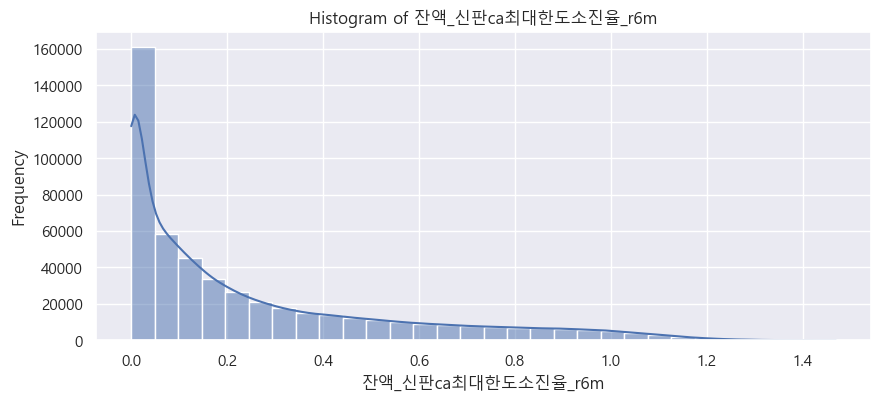


[📦 Boxplot for '잔액_신판ca최대한도소진율_r6m']



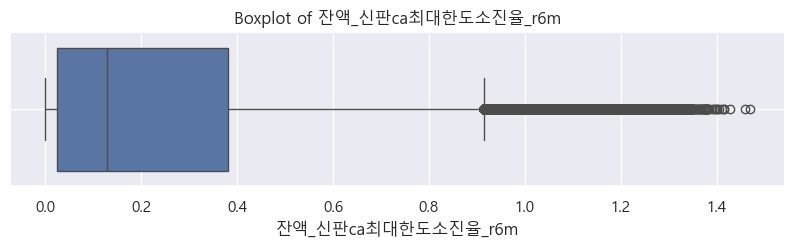

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '잔액_신판ca평균한도소진율_r3m']

잔액_신판ca평균한도소진율_r3m
0.000000    105775
0.008623         4
0.048908         4
0.002915         4
0.002361         4
             ...  
0.027145         1
0.130112         1
0.331988         1
0.011482         1
0.006477         1
Name: count, Length: 387895, dtype: int64

[📈 Histogram for '잔액_신판ca평균한도소진율_r3m']



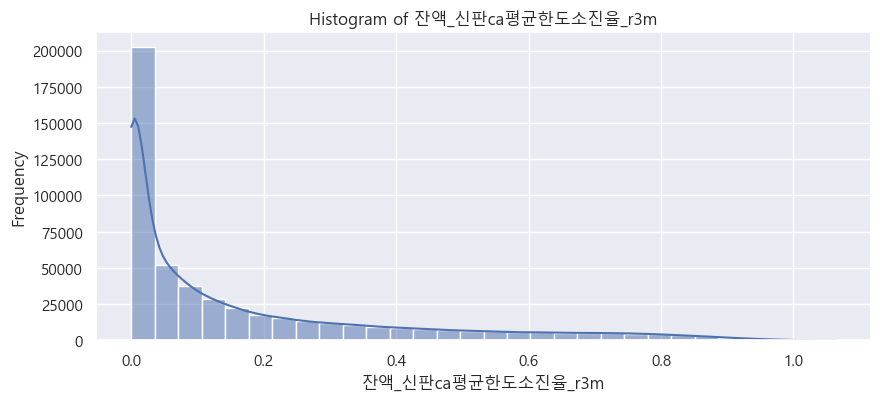


[📦 Boxplot for '잔액_신판ca평균한도소진율_r3m']



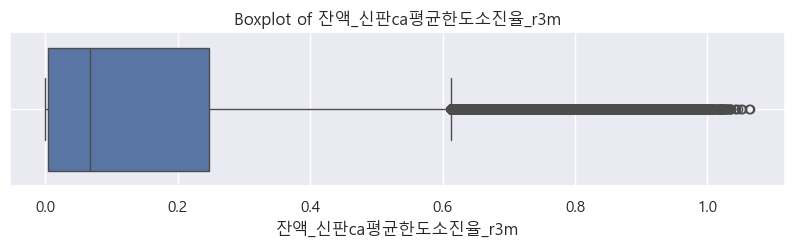

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '잔액_신판ca최대한도소진율_r3m']

잔액_신판ca최대한도소진율_r3m
0.000000    95972
0.003901        3
0.004288        3
0.031877        3
0.047831        3
            ...  
0.692689        1
0.195564        1
0.075167        1
0.104688        1
0.547084        1
Name: count, Length: 400624, dtype: int64

[📈 Histogram for '잔액_신판ca최대한도소진율_r3m']



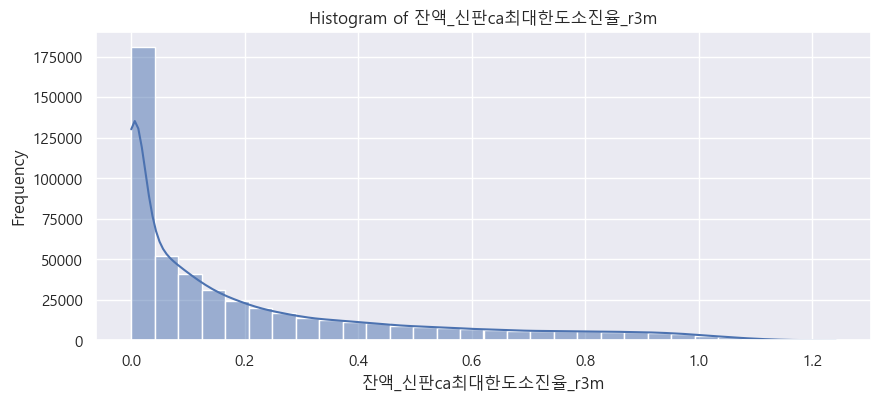


[📦 Boxplot for '잔액_신판ca최대한도소진율_r3m']



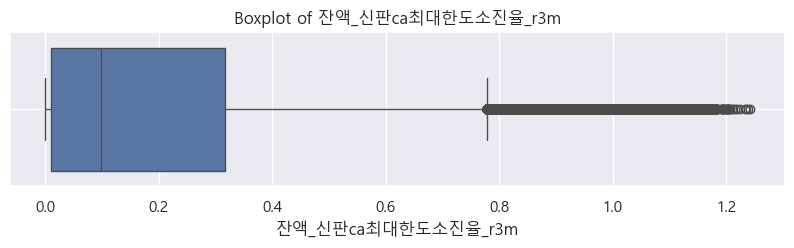

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_일시불평잔']

변동률_일시불평잔
0.999998    55205
0.000000    42537
1.999996     2350
2.062496       49
0.929802        3
            ...  
1.374329        1
0.871339        1
1.062111        1
0.769587        1
1.001215        1
Name: count, Length: 398289, dtype: int64

[📈 Histogram for '변동률_일시불평잔']



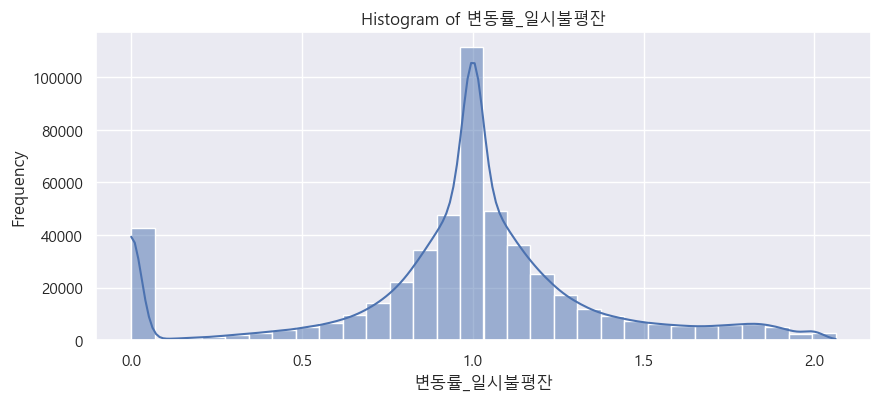


[📦 Boxplot for '변동률_일시불평잔']



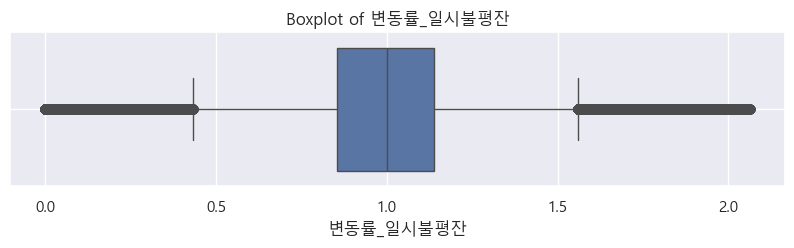

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_RV일시불평잔']

변동률_RV일시불평잔
0.999998    389106
0.000000     27600
1.063184         2
1.044732         2
1.007919         2
             ...  
0.977128         1
1.102019         1
1.042602         1
1.166965         1
1.029242         1
Name: count, Length: 83167, dtype: int64

[📈 Histogram for '변동률_RV일시불평잔']



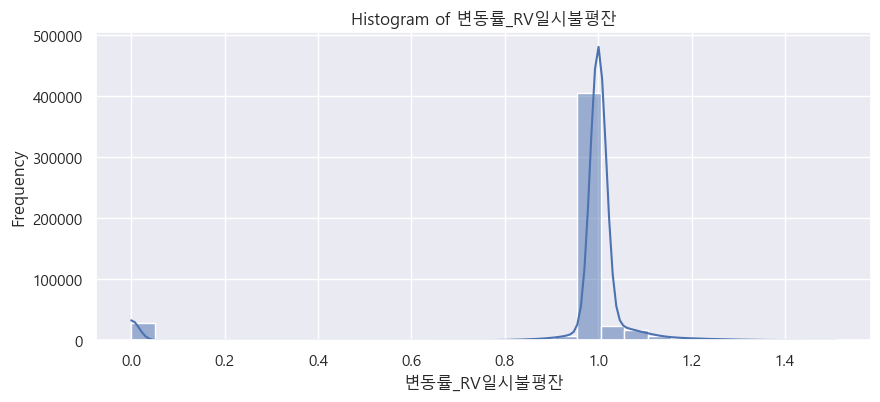


[📦 Boxplot for '변동률_RV일시불평잔']



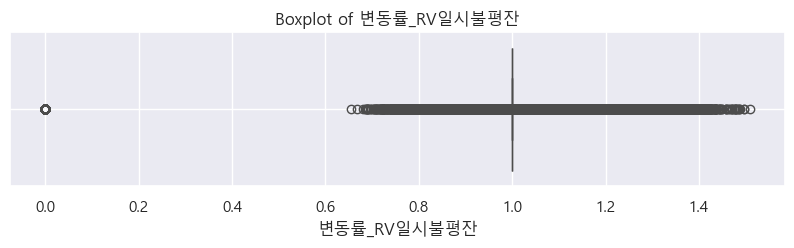

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_할부평잔']

변동률_할부평잔
0.999998    246390
0.000000     53335
0.900872         4
0.903156         3
0.904863         3
             ...  
1.067838         1
0.776806         1
0.317875         1
0.580316         1
0.586286         1
Name: count, Length: 198103, dtype: int64

[📈 Histogram for '변동률_할부평잔']



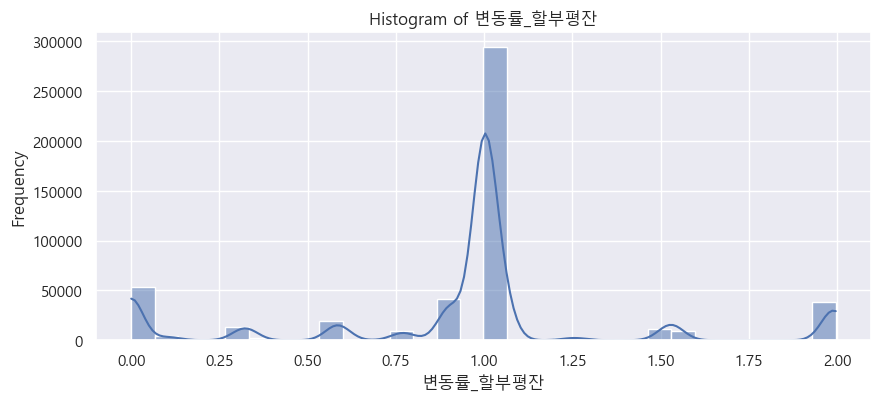


[📦 Boxplot for '변동률_할부평잔']



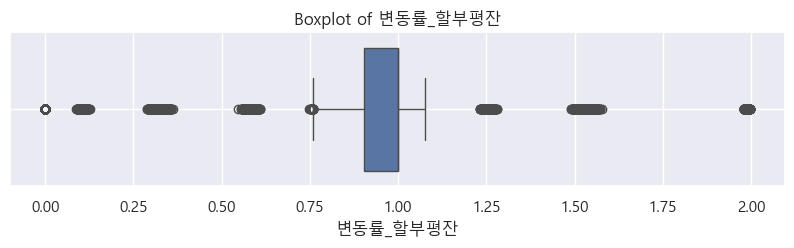

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_CA평잔']

변동률_CA평잔
0.999998    425152
0.000000     39440
1.992044         3
1.991723         3
1.001302         3
             ...  
1.992810         1
1.992845         1
0.850391         1
1.002820         1
0.855248         1
Name: count, Length: 35032, dtype: int64

[📈 Histogram for '변동률_CA평잔']



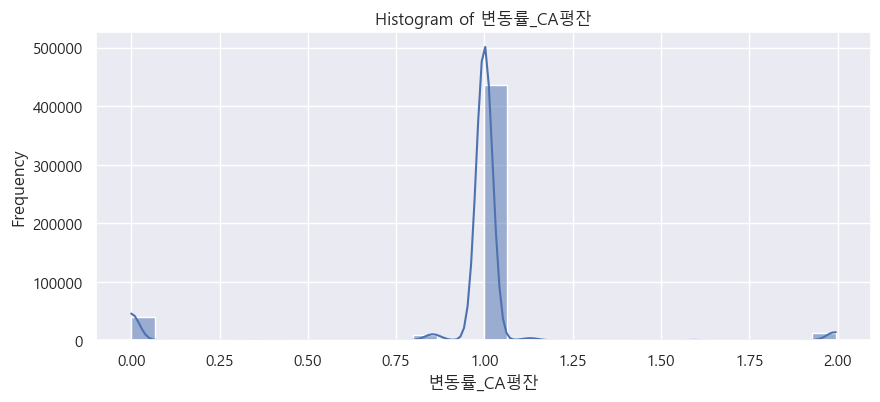


[📦 Boxplot for '변동률_CA평잔']



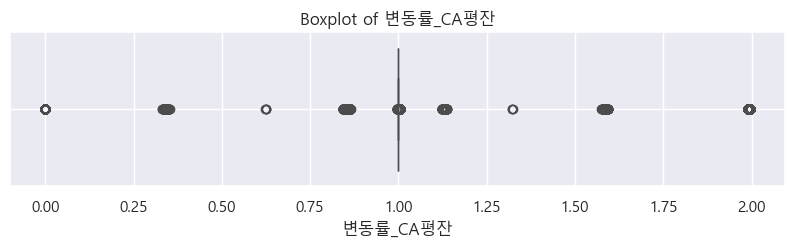

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_RVCA평잔']

변동률_RVCA평잔
0.999998    473290
0.000000     25971
0.995699         2
0.995593         1
0.995836         1
             ...  
0.996359         1
1.987761         1
0.996488         1
0.995736         1
0.994859         1
Name: count, Length: 740, dtype: int64

[📈 Histogram for '변동률_RVCA평잔']



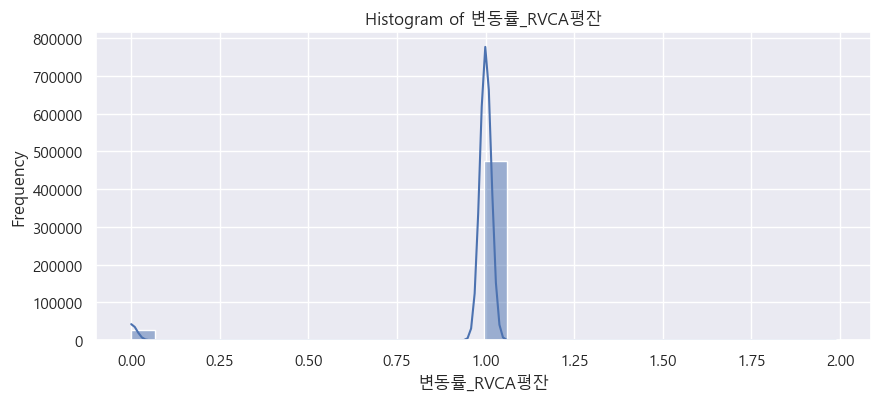


[📦 Boxplot for '변동률_RVCA평잔']



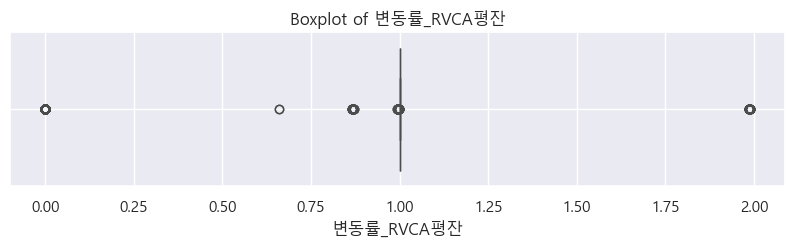

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_카드론평잔']

변동률_카드론평잔
0.999998    435773
0.000000     32392
1.992865         2
0.924918         2
0.926939         2
             ...  
0.930531         1
0.922257         1
0.923783         1
1.994965         1
1.996951         1
Name: count, Length: 31676, dtype: int64

[📈 Histogram for '변동률_카드론평잔']



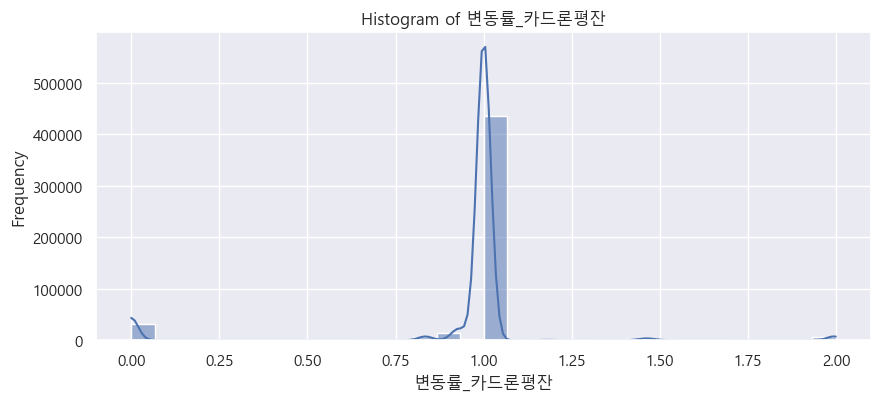


[📦 Boxplot for '변동률_카드론평잔']



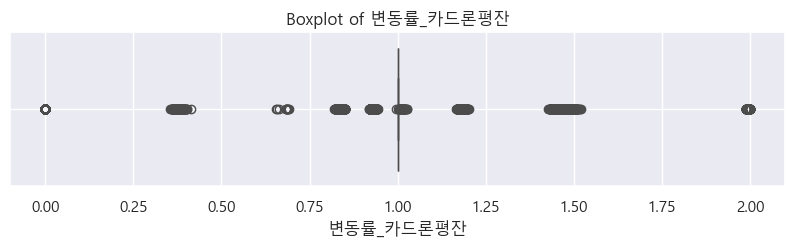

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_잔액_B1M']

변동률_잔액_B1M
 0.000000    120689
 1.999996     13498
-1.999996      8908
-0.127565         3
-0.129429         2
              ...  
-0.239498         1
 0.521931         1
-0.080440         1
 0.391535         1
-0.156037         1
Name: count, Length: 355760, dtype: int64

[📈 Histogram for '변동률_잔액_B1M']



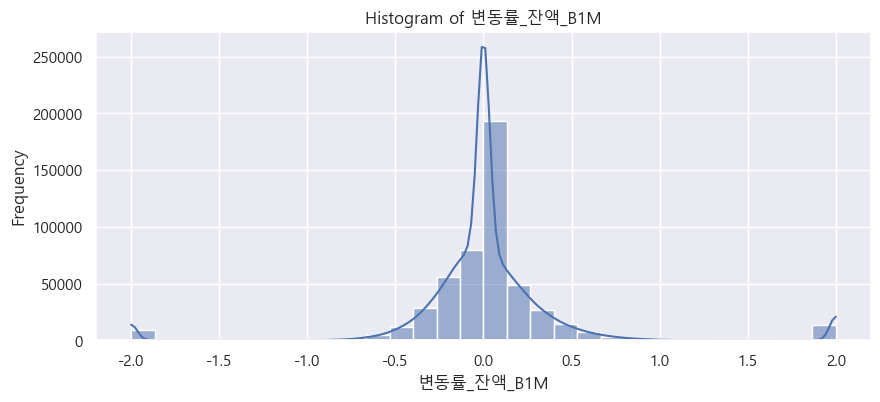


[📦 Boxplot for '변동률_잔액_B1M']



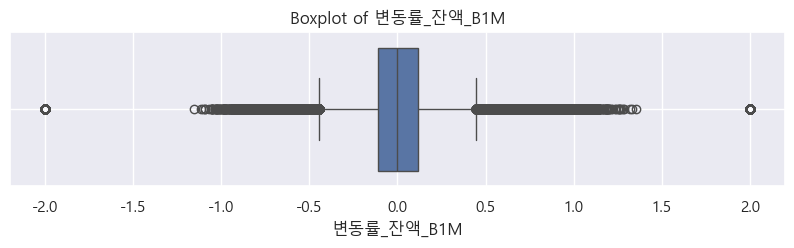

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_잔액_일시불_B1M']

변동률_잔액_일시불_B1M
 0.000000    139068
 1.999996     20531
-1.999996     12289
 0.382842         3
 0.001521         3
              ...  
 0.001448         1
 0.038325         1
 0.007280         1
 0.234009         1
-0.168812         1
Name: count, Length: 327221, dtype: int64

[📈 Histogram for '변동률_잔액_일시불_B1M']



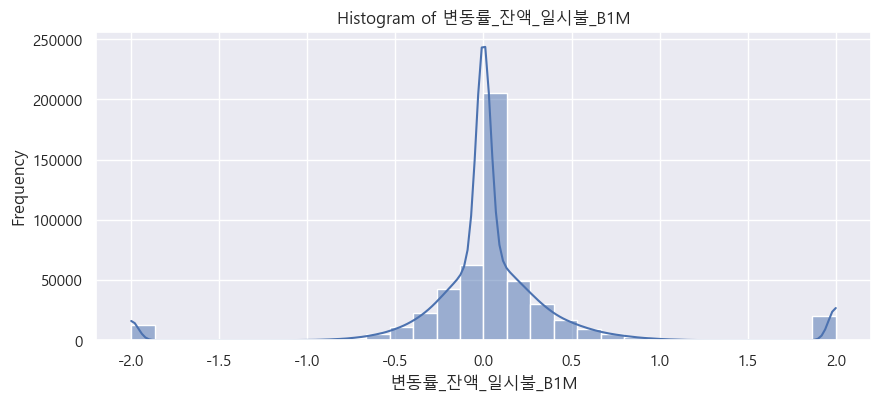


[📦 Boxplot for '변동률_잔액_일시불_B1M']



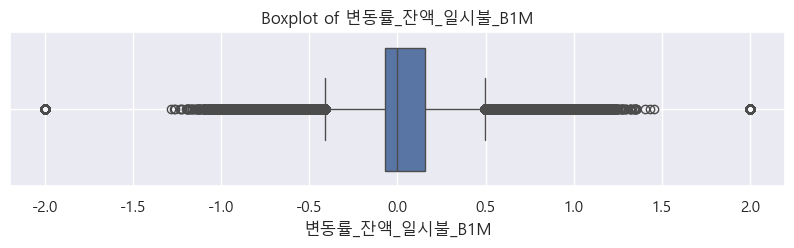

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '변동률_잔액_CA_B1M']

변동률_잔액_CA_B1M
 0.000000    481307
-1.999996      3037
 1.999996        11
 0.009833         2
 0.021358         2
              ...  
 0.017618         1
 0.012531         1
-0.045274         1
 0.032307         1
 0.031985         1
Name: count, Length: 15637, dtype: int64

[📈 Histogram for '변동률_잔액_CA_B1M']



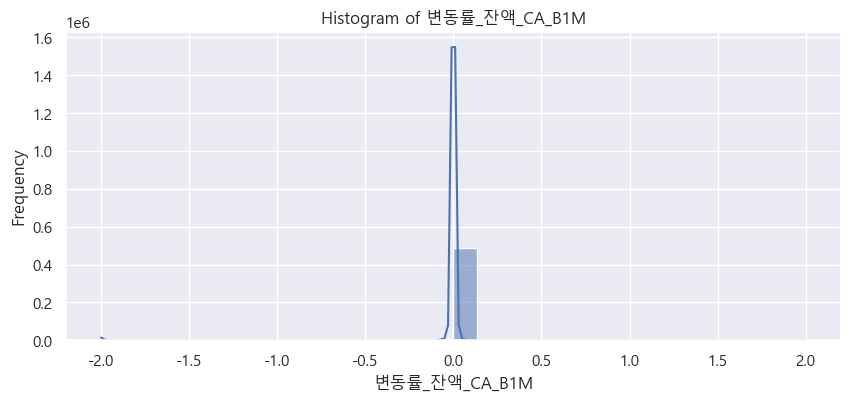


[📦 Boxplot for '변동률_잔액_CA_B1M']



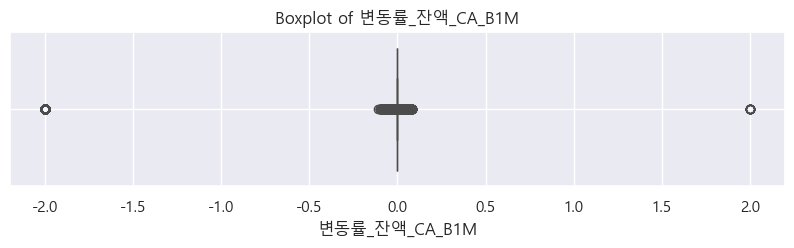

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '혜택수혜율_R3M']

혜택수혜율_R3M
0.000000     156208
NaN           88348
99.999800     13106
0.463189          2
1.458032          2
              ...  
0.896209          1
0.622049          1
1.848317          1
1.652476          1
8.581430          1
Name: count, Length: 241494, dtype: int64

[📈 Histogram for '혜택수혜율_R3M']



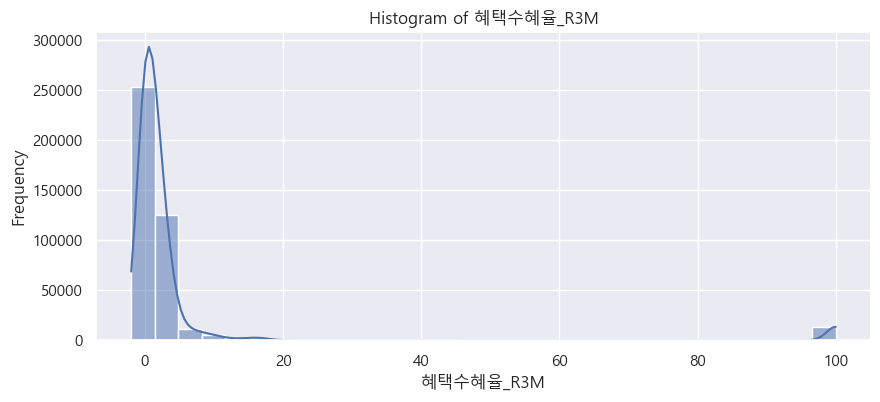


[📦 Boxplot for '혜택수혜율_R3M']



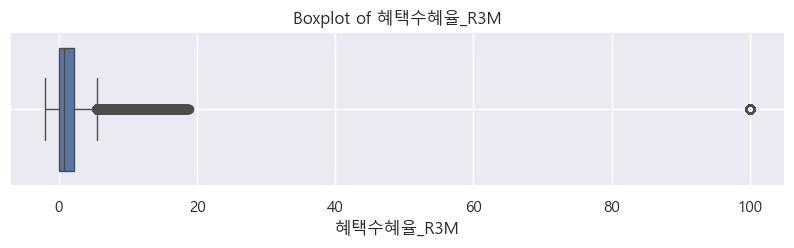

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

[📊 Value Counts for '혜택수혜율_B0M']

혜택수혜율_B0M
0.000000     170160
NaN          113660
99.999800     15372
3.224065          2
1.521237          2
              ...  
1.724381          1
3.303842          1
2.396881          1
3.477280          1
9.887948          1
Name: count, Length: 200259, dtype: int64

[📈 Histogram for '혜택수혜율_B0M']



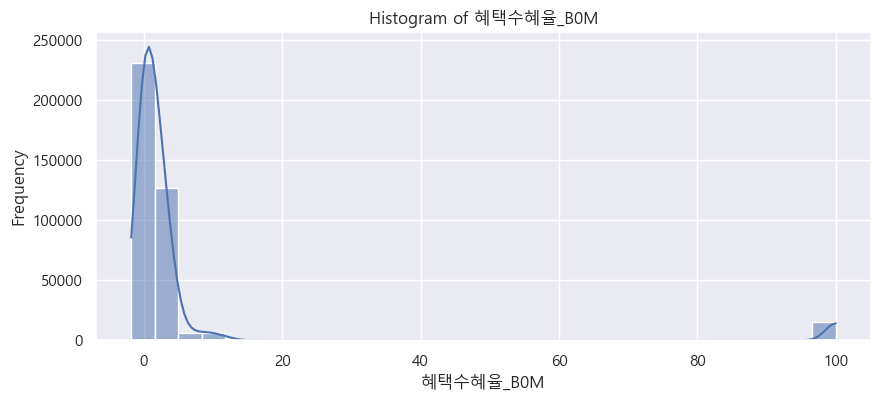


[📦 Boxplot for '혜택수혜율_B0M']



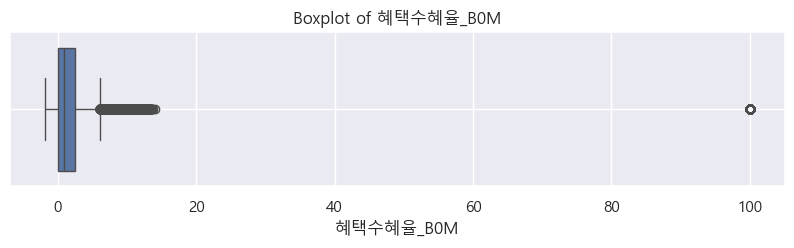

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


In [31]:
# 컬럼 하나하나 반복해서 출력하게 해준다.
for a1 in column_list:
    analyze_column(f"{a1}")
    print('-' * 150)
    print('-' * 150)
    print('-' * 150)
    print('-' * 150)

### 0은 제외하고 보는 함수 
- 0의 도수가 너무 커서 분포를 보기 힘들다면 여기에 넣기 

In [42]:
def analyze_no_zero(col):
    # 숫자형 컬럼이 아닌 경우는 분석하지 않음
    if not pd.api.types.is_numeric_dtype(all_df[col]):
        print(f"\n[⛔ '{col}'은 숫자형 컬럼이 아니므로 0 이상 필터링 불가. 분석 생략]\n")
        return

    # 0보다 큰 값만 필터링
    filtered_df = all_df.query(f"{col} != 0")

    # 1. 값의 분포 출력
    print(f"\n[📊 Value Counts for '{col}' != 0]\n")
    print(filtered_df[col].value_counts(dropna=False))

    # 2. 히스토그램
    print(f"\n[📈 Histogram for '{col}' != 0]\n")
    plt.figure(figsize=(10, 4))
    sns.histplot(data=filtered_df, x=col, kde=True, bins=30)
    plt.title(f"Histogram of {col} (!= 0)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # 3. 박스플롯
    print(f"\n[📦 Boxplot for '{col}' != 0]\n")
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=filtered_df, x=col)
    plt.title(f"Boxplot of {col} (!= 0)")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


[📊 Value Counts for '잔액_신판최대한도소진율_r3m' != 0]

잔액_신판최대한도소진율_r3m
0.000504    3
0.014106    3
0.015102    3
0.015317    3
0.004635    3
           ..
0.056698    1
0.063579    1
0.018133    1
0.037855    1
0.557315    1
Name: count, Length: 393804, dtype: int64

[📈 Histogram for '잔액_신판최대한도소진율_r3m' != 0]



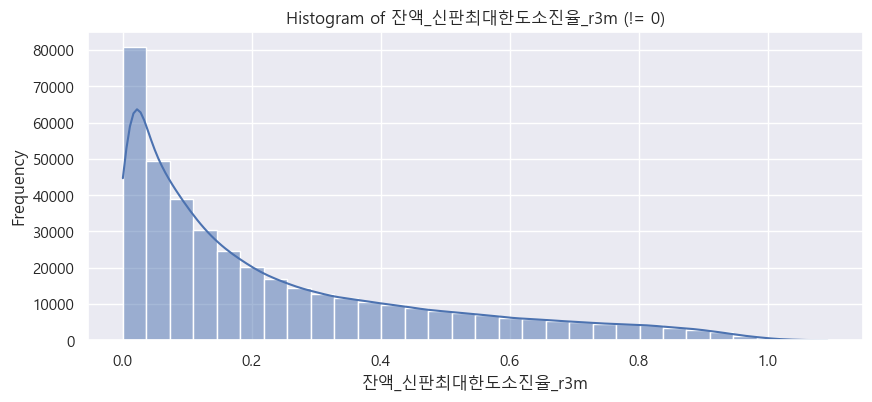


[📦 Boxplot for '잔액_신판최대한도소진율_r3m' != 0]



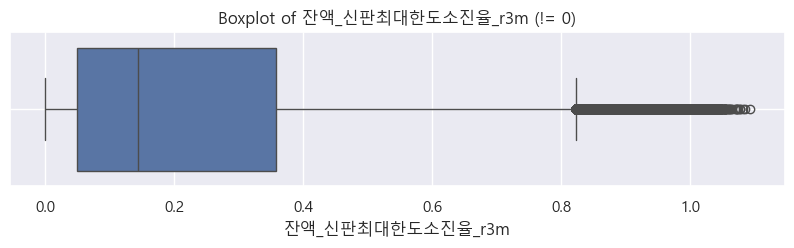

In [46]:
analyze_no_zero('잔액_신판최대한도소진율_r3m')